# SimplerEnv: Simulated Manipulation Policy Evaluation for Real-World Robots

- Project page: <https://simpler-env.github.io/>
- Code: <https://github.com/simpler-env/SimplerEnv>

## Installation


In [1]:
#@title [!Important]Please use a GPU runtime.
!nvidia-smi

Thu Jun  6 03:38:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:

# @title Install vulkan for rendering
!apt-get install -yqq --no-install-recommends libvulkan-dev vulkan-tools
# below fixes some bugs introduced by some recent Colab changes
!mkdir -p /usr/share/vulkan/icd.d
!wget -q -P /usr/share/vulkan/icd.d https://raw.githubusercontent.com/haosulab/ManiSkill/main/docker/nvidia_icd.json
!wget -q -O /usr/share/glvnd/egl_vendor.d/10_nvidia.json https://raw.githubusercontent.com/haosulab/ManiSkill/main/docker/10_nvidia.json

Selecting previously unselected package libvulkan1:amd64.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../libvulkan1_1.3.204.1-2_amd64.deb ...
Unpacking libvulkan1:amd64 (1.3.204.1-2) ...
Selecting previously unselected package libvulkan-dev:amd64.
Preparing to unpack .../libvulkan-dev_1.3.204.1-2_amd64.deb ...
Unpacking libvulkan-dev:amd64 (1.3.204.1-2) ...
Selecting previously unselected package vulkan-tools.
Preparing to unpack .../vulkan-tools_1.3.204.0+dfsg1-1_amd64.deb ...
Unpacking vulkan-tools (1.3.204.0+dfsg1-1) ...
Setting up libvulkan1:amd64 (1.3.204.1-2) ...
Setting up libvulkan-dev:amd64 (1.3.204.1-2) ...
Setting up vulkan-tools (1.3.204.0+dfsg1-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is n

In [3]:
# @title Make sure vulkan is installed correctly
!vulkaninfo | head -n 5

'DISPLAY' environment variable not set... skipping surface info
error: XDG_RUNTIME_DIR not set in the environment.
VULKANINFO

Vulkan Instance Version: 1.3.204


In [4]:
# @title Install Real2Sim
!git clone https://github.com/simpler-env/ManiSkill2_real2sim.git
!pip install -e ./ManiSkill2_real2sim
!git clone https://github.com/simpler-env/SimplerEnv.git
!pip install -e ./SimplerEnv
!mkdir ./SimplerEnv/checkpoints

Cloning into 'ManiSkill2_real2sim'...
remote: Enumerating objects: 3448, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 3448 (delta 73), reused 96 (delta 34), pack-reused 3301
Receiving objects: 100% (3448/3448), 188.75 MiB | 28.96 MiB/s, done.
Resolving deltas: 100% (1833/1833), done.
Updating files: 100% (661/661), done.
Obtaining file:///content/ManiSkill2_real2sim
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 73.

In [5]:
#@title [Optional]Install RT-1 dependencies
! pip install --quiet tf_agents

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 12.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 51.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu

In [27]:
#@title [Optional]Install Octo dependencies
!git clone https://github.com/octo-models/octo
!pip install -e ./octo
# Or please follow the instruction of Octo
# !pip3 install -r ./octo/requirements.txt
# !pip install --upgrade "jax[cuda12_pip]==0.4.20" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install distrax==0.1.5 "einops>= 0.6.1"

fatal: destination path 'octo' already exists and is not an empty directory.
Obtaining file:///content/octo
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for octo (pyproject.toml) ... done
  Created wheel for octo: filename=octo-0.0.0-0.editable-py3-none-any.whl size=3374 sha256=4a15e07b7224e400770463c27fb03d5d764eafa3364cb3600351151a391fdc4a
  Stored in directory: /tmp/pip-ephem-wheel-cache-1taerjp5/wheels/66/42/18/cf44976e18724f184efd64bbc31830460087187fa524fa6e42
Successfully built octo
  Attempting uninstall: octo
    Found existing installation: octo 0.0.0
    Uninstalling octo-0.0.0:
      Successfully uninstalled octo-0.0.0


In [9]:
!git clone https://github.com/kvablack/dlimp
%cd dlimp
!pip install -e .

fatal: destination path 'dlimp' already exists and is not an empty directory.
/content/dlimp
Obtaining file:///content/dlimp
  Preparing metadata (setup.py) ... done
  Running setup.py develop for dlimp


In [7]:
# @title Install other requirements
!pip install --quiet mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00


In [1]:
# @title [Important]Post Installation

# run this so local pip installs are recognized
import site
site.main()

## Create a Simulated Environment and Take Random Actions

In [2]:
import simpler_env
from simpler_env.utils.env.observation_utils import get_image_from_maniskill2_obs_dict
import mediapy
import sapien.core as sapien

task_name = "google_robot_pick_coke_can"  # @param ["google_robot_pick_coke_can", "google_robot_move_near", "google_robot_open_drawer", "google_robot_close_drawer", "widowx_spoon_on_towel", "widowx_carrot_on_plate", "widowx_stack_cube", "widowx_put_eggplant_in_basket"]

if 'env' in locals():
  print("Closing existing env")
  env.close()
  del env
env = simpler_env.make(task_name)
# Colab GPU does not supoort denoiser
sapien.render_config.rt_use_denoiser = False
obs, reset_info = env.reset()
instruction = env.get_language_instruction()
print("Reset info", reset_info)
print("Instruction", instruction)

frames = []
done, truncated = False, False
while not (done or truncated):
   # action[:3]: delta xyz; action[3:6]: delta rotation in axis-angle representation;
   # action[6:7]: gripper (the meaning of open / close depends on robot URDF)
   image = get_image_from_maniskill2_obs_dict(env, obs)
   action = env.action_space.sample() # replace this with your policy inference
   obs, reward, done, truncated, info = env.step(action)
   frames.append(image)

episode_stats = info.get('episode_stats', {})
print("Episode stats", episode_stats)
mediapy.show_video(frames, fps=10)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_language_instruction to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_language_instruction` for environment variables or `env.get_wrapper_attr('get_language_instruction')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.robot_uid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.robot_uid` for environment variables or `env.get_wrapper_attr('robot_uid')` that will search the reminding wrappers.
  logger.warn(


Reset info {'scene_name': 'google_pick_coke_can_1_v4', 'scene_offset': None, 'scene_pose': None, 'scene_table_height': 0.87, 'urdf_version': 'recolor_tabletop_visual_matching_1', 'rgb_overlay_path': '/content/ManiSkill2_real2sim/data/real_inpainting/google_coke_can_real_eval_1.png', 'rgb_overlay_cameras': ['overhead_camera'], 'rgb_overlay_mode': 'background', 'disable_bad_material': False, 'model_id': 'opened_coke_can', 'model_scale': 1.0, 'distractor_model_ids': None, 'distractor_model_scales': None, 'obj_init_pose_wrt_robot_base': Pose([0.587925, -0.0238302, 0.840576], [0.707052, -0.0081018, -0.01162, -0.70702]), 'orientation': 'laid_vertically'}
Instruction pick coke can
Episode stats OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', False)])


## Run Inference on Simulated Environments

In [6]:
# @title Setup

import os
import numpy as np
import simpler_env
from simpler_env.utils.env.observation_utils import get_image_from_maniskill2_obs_dict
import mediapy


RT_1_CHECKPOINTS = {
    "rt_1_x": "rt_1_x_tf_trained_for_002272480_step",
    "rt_1_400k": "rt_1_tf_trained_for_000400120",
    "rt_1_58k": "rt_1_tf_trained_for_000058240",
    "rt_1_1k": "rt_1_tf_trained_for_000001120",
}


def get_rt_1_checkpoint(name, ckpt_dir="./SimplerEnv/checkpoints"):
  assert name in RT_1_CHECKPOINTS, name
  ckpt_name = RT_1_CHECKPOINTS[name]
  ckpt_path = os.path.join(ckpt_dir, ckpt_name)
  if not os.path.exists(ckpt_path):
    if name == "rt_1_x":
      !gsutil -m cp -r gs://gdm-robotics-open-x-embodiment/open_x_embodiment_and_rt_x_oss/{ckpt_name}.zip {ckpt_dir}
      !unzip {ckpt_dir}/{ckpt_name}.zip -d {ckpt_dir}
    else:
      !gsutil -m cp -r gs://gdm-robotics-open-x-embodiment/open_x_embodiment_and_rt_x_oss/{ckpt_name} {ckpt_dir}
  return ckpt_path

In [4]:
# @title Select your model and environment

task_name = "google_robot_pick_coke_can"  # @param ["google_robot_pick_coke_can", "google_robot_move_near", "google_robot_open_drawer", "google_robot_close_drawer", "widowx_spoon_on_towel", "widowx_carrot_on_plate", "widowx_stack_cube", "widowx_put_eggplant_in_basket"]

if 'env' in locals():
  print("Closing existing env")
  env.close()
  del env
env = simpler_env.make(task_name)

# Note: we turned off the denoiser as the colab kernel will crash if it's turned on
# To use the denoiser, please git clone our SIMPLER environments
# and perform evaluations locally.
sapien.render_config.rt_use_denoiser = False

obs, reset_info = env.reset()
instruction = env.get_language_instruction()
print("Reset info", reset_info)
print("Instruction", instruction)

if "google" in task_name:
  policy_setup = "google_robot"
else:
  policy_setup = "widowx_bridge"

Closing existing env
Reset info {'scene_name': 'google_pick_coke_can_1_v4', 'scene_offset': None, 'scene_pose': None, 'scene_table_height': 0.87, 'urdf_version': 'recolor_tabletop_visual_matching_1', 'rgb_overlay_path': '/content/ManiSkill2_real2sim/data/real_inpainting/google_coke_can_real_eval_1.png', 'rgb_overlay_cameras': ['overhead_camera'], 'rgb_overlay_mode': 'background', 'disable_bad_material': False, 'model_id': 'opened_coke_can', 'model_scale': 1.0, 'distractor_model_ids': None, 'distractor_model_scales': None, 'obj_init_pose_wrt_robot_base': Pose([0.587925, -0.0238302, 0.840576], [0.707052, -0.0081018, -0.01162, -0.70702]), 'orientation': 'laid_vertically'}
Instruction pick coke can


In [14]:
#@title Run inference google_robot_pick_coke_can_rt_1_x


from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_x"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_pick_coke_can_rt_1_x_success = []
google_robot_pick_coke_can_rt_1_x_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_pick_coke_can_rt_1_x_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_pick_coke_can_rt_1_x_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_pick_coke_can_rt_1_x_success),
    f"({np.sum(google_robot_pick_coke_can_rt_1_x_success)}/{len(google_robot_pick_coke_can_rt_1_x_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_pick_coke_can_rt_1_x_timesteps),
    f"({np.sum(google_robot_pick_coke_can_rt_1_x_timesteps)}/{len(google_robot_pick_coke_can_rt_1_x_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_language_instruction to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_language_instruction` for environment variables or `env.get_wrapper_attr('get_language_instruction')` that will search the reminding wrappers.
  logger.warn(


pick coke can


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.robot_uid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.robot_uid` for environment variables or `env.get_wrapper_attr('robot_uid')` that will search the reminding wrappers.
  logger.warn(


Episode 0 success: False
Episode 0 Timesteps: 25 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', False)])
pick coke can
Episode 1 success: True
Episode 1 Timesteps: 80 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 2 success: True
Episode 2 Timesteps: 57 Stats: OrderedDict([('n_lift_significant', 2), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 3 success: True
Episode 3 Timesteps: 20 Stats: OrderedDict([('n_lift_significant', 4), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 4 success: False
Episode 4 Timesteps: 80 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 5 success: True
Episode 5 Timesteps: 80 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', True)])
pick coke can
Episode 6 success: False
Episode 6 Timesteps: 80 Stats: OrderedDict([('n_lift

In [16]:
#@title Run inference google_robot_pick_coke_can_rt_1_400k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_400k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_pick_coke_can_rt_1_400k_success = []
google_robot_pick_coke_can_rt_1_400k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_pick_coke_can_rt_1_400k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_pick_coke_can_rt_1_400k_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_pick_coke_can_rt_1_400k_success),
    f"({np.sum(google_robot_pick_coke_can_rt_1_400k_success)}/{len(google_robot_pick_coke_can_rt_1_400k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_pick_coke_can_rt_1_400k_timesteps),
    f"({np.sum(google_robot_pick_coke_can_rt_1_400k_timesteps)}/{len(google_robot_pick_coke_can_rt_1_400k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_language_instruction to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_language_instruction` for environment variables or `env.get_wrapper_attr('get_language_instruction')` that will search the reminding wrappers.
  logger.warn(


pick coke can


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.robot_uid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.robot_uid` for environment variables or `env.get_wrapper_attr('robot_uid')` that will search the reminding wrappers.
  logger.warn(


Episode 0 success: True
Episode 0 Timesteps: 25 Stats: OrderedDict([('n_lift_significant', 4), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 1 success: False
Episode 1 Timesteps: 18 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', False)])
pick coke can
Episode 2 success: True
Episode 2 Timesteps: 15 Stats: OrderedDict([('n_lift_significant', 4), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 3 success: True
Episode 3 Timesteps: 18 Stats: OrderedDict([('n_lift_significant', 3), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 4 success: True
Episode 4 Timesteps: 16 Stats: OrderedDict([('n_lift_significant', 4), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 5 success: True
Episode 5 Timesteps: 13 Stats: OrderedDict([('n_lift_significant', 3), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 6 success: True
Episode 6 Timesteps: 20 Stats: OrderedDict([('n_lift_si

In [17]:
#@title Run inference google_robot_pick_coke_can_rt_1_58k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_58k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_pick_coke_can_rt_1_58k_success = []
google_robot_pick_coke_can_rt_1_58k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_pick_coke_can_rt_1_58k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_pick_coke_can_rt_1_58k_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_pick_coke_can_rt_1_58k_success),
    f"({np.sum(google_robot_pick_coke_can_rt_1_58k_success)}/{len(google_robot_pick_coke_can_rt_1_58k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_pick_coke_can_rt_1_58k_timesteps),
    f"({np.sum(google_robot_pick_coke_can_rt_1_58k_timesteps)}/{len(google_robot_pick_coke_can_rt_1_58k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

pick coke can
Episode 0 success: False
Episode 0 Timesteps: 80 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', False)])
pick coke can
Episode 1 success: True
Episode 1 Timesteps: 18 Stats: OrderedDict([('n_lift_significant', 3), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 2 success: True
Episode 2 Timesteps: 21 Stats: OrderedDict([('n_lift_significant', 4), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 3 success: False
Episode 3 Timesteps: 80 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 4 success: False
Episode 4 Timesteps: 80 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 5 success: True
Episode 5 Timesteps: 24 Stats: OrderedDict([('n_lift_significant', 4), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 6 success: True
Episode 6 Timesteps: 23 Stats: OrderedD

In [18]:
#@title Run inference google_robot_pick_coke_can_rt_1_1k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_1k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_pick_coke_can_rt_1_1k_success = []
google_robot_pick_coke_can_rt_1_1k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_pick_coke_can_rt_1_1k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_pick_coke_can_rt_1_1k_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_pick_coke_can_rt_1_1k_success),
    f"({np.sum(google_robot_pick_coke_can_rt_1_1k_success)}/{len(google_robot_pick_coke_can_rt_1_1k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_pick_coke_can_rt_1_1k_timesteps),
    f"({np.sum(google_robot_pick_coke_can_rt_1_1k_timesteps)}/{len(google_robot_pick_coke_can_rt_1_1k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

pick coke can
Episode 0 success: False
Episode 0 Timesteps: 34 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', True)])
pick coke can
Episode 1 success: False
Episode 1 Timesteps: 80 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', False)])
pick coke can
Episode 2 success: False
Episode 2 Timesteps: 80 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', False)])
pick coke can
Episode 3 success: False
Episode 3 Timesteps: 80 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 4 success: False
Episode 4 Timesteps: 80 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', False), ('grasped', False)])
pick coke can
Episode 5 success: False
Episode 5 Timesteps: 80 Stats: OrderedDict([('n_lift_significant', 0), ('consec_grasp', True), ('grasped', True)])
pick coke can
Episode 6 success: False
Episode 6 Timesteps: 80 Stats:

## Gallery

In [19]:
print(google_robot_pick_coke_can_rt_1_1k_success)

[False, False, False, False, False, False, False, False, False, False]


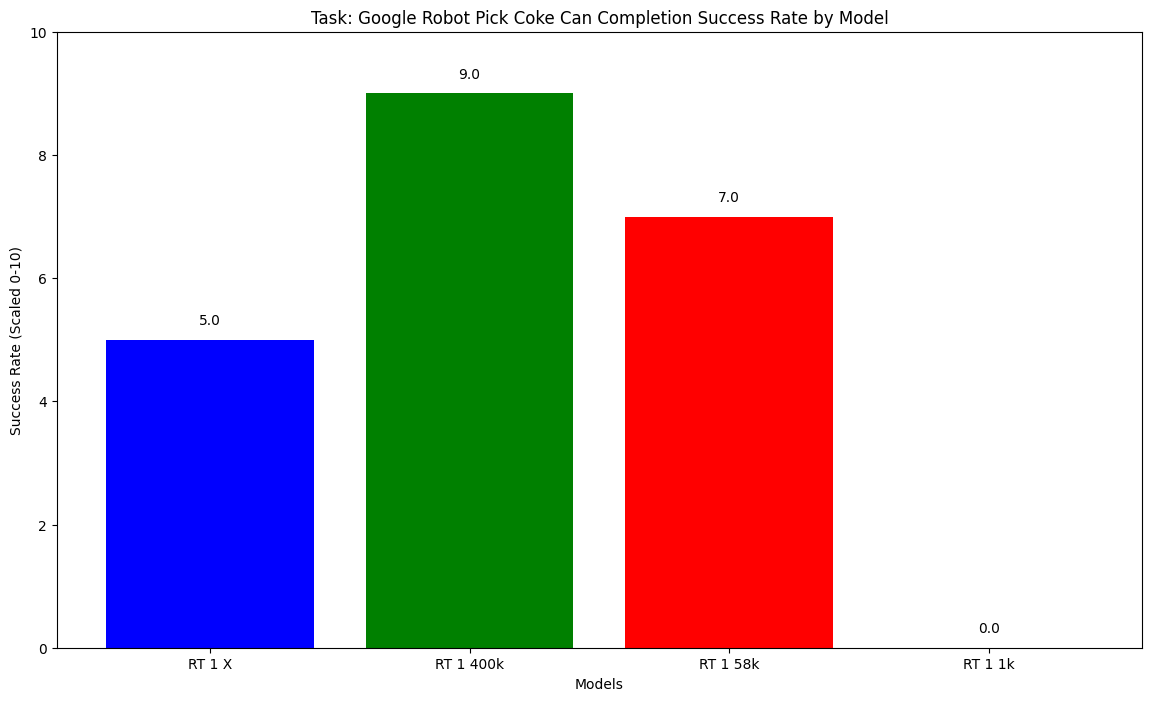

In [30]:

import matplotlib.pyplot as plt
import numpy as np

# Example data for four models (replace these with your actual data)
model_1_success = google_robot_pick_coke_can_rt_1_x_success
model_2_success = google_robot_pick_coke_can_rt_1_400k_success
model_3_success = google_robot_pick_coke_can_rt_1_58k_success
model_4_success = google_robot_pick_coke_can_rt_1_1k_success

# List of model names and their success data
models = {
    'RT 1 X': model_1_success,
    'RT 1 400k': model_2_success,
    'RT 1 58k': model_3_success,
    'RT 1 1k': model_4_success
}

# Calculate success rates and scale them to a range of 0-10
model_names = []
success_rates = []

for model_name, success_data in models.items():
    success_rate = np.mean(success_data) * 10  # Scale success rate to 0-10
    model_names.append(model_name)
    success_rates.append(success_rate)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, success_rates, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Task: Google Robot Pick Coke Can Completion Success Rate by Model')
plt.xlabel('Models')
plt.ylabel('Success Rate (Scaled 0-10)')
plt.ylim(0, 10)  # Success rate ranges from 0 to 10

# Annotate bars with success rate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()


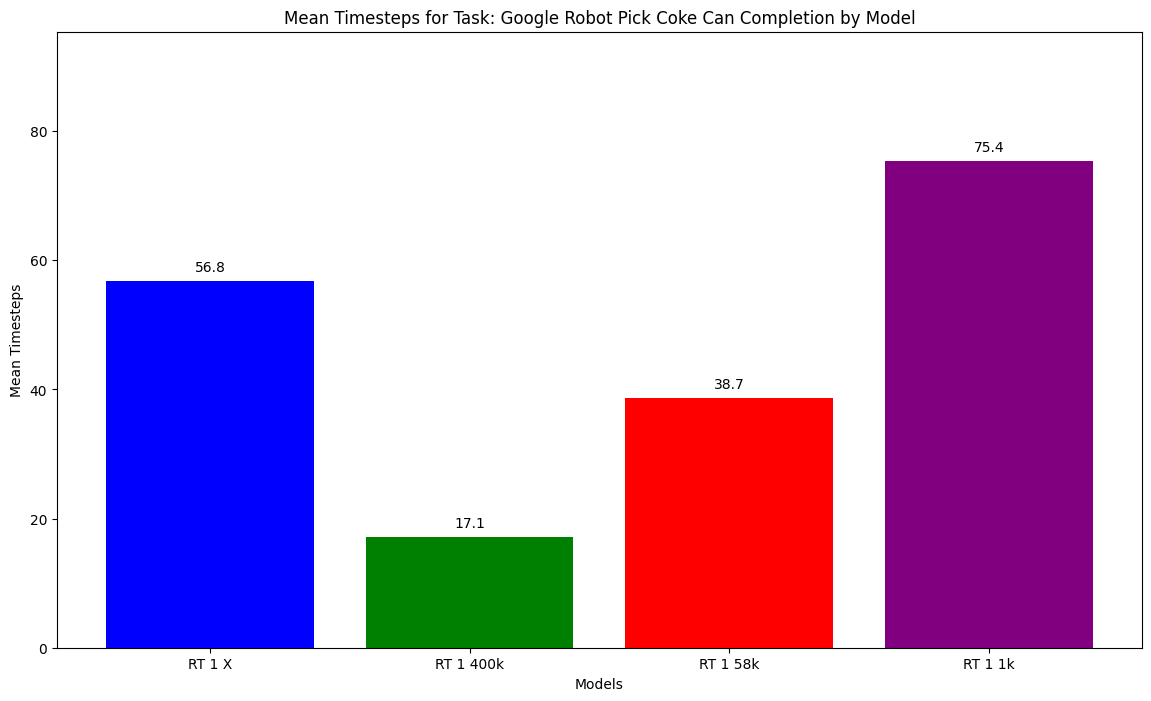

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Example timestep data for four models (replace these with your actual data)
model_1_timesteps = google_robot_pick_coke_can_rt_1_x_timesteps
model_2_timesteps = google_robot_pick_coke_can_rt_1_400k_timesteps
model_3_timesteps = google_robot_pick_coke_can_rt_1_58k_timesteps
model_4_timesteps = google_robot_pick_coke_can_rt_1_1k_timesteps

# List of model names and their timesteps data
models_timesteps = {
    'RT 1 X': model_1_timesteps,
    'RT 1 400k': model_2_timesteps,
    'RT 1 58k': model_3_timesteps,
    'RT 1 1k': model_4_timesteps
}

# Calculate mean timesteps
model_names = []
mean_timesteps = []

for model_name, timesteps_data in models_timesteps.items():
    mean_timestep = np.mean(timesteps_data)
    model_names.append(model_name)
    mean_timesteps.append(mean_timestep)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, mean_timesteps, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Mean Timesteps for Task: Google Robot Pick Coke Can Completion by Model')
plt.xlabel('Models')
plt.ylabel('Mean Timesteps')
plt.ylim(0, max(mean_timesteps) + 20)  # Adjust ylim to fit the highest mean timestep

# Annotate bars with mean timestep values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()


In [31]:
# @title Select your model and environment

task_name = "google_robot_move_near"  # @param ["google_robot_pick_coke_can", "google_robot_move_near", "google_robot_open_drawer", "google_robot_close_drawer", "widowx_spoon_on_towel", "widowx_carrot_on_plate", "widowx_stack_cube", "widowx_put_eggplant_in_basket"]

if 'env' in locals():
  print("Closing existing env")
  env.close()
  del env
env = simpler_env.make(task_name)

# Note: we turned off the denoiser as the colab kernel will crash if it's turned on
# To use the denoiser, please git clone our SIMPLER environments
# and perform evaluations locally.
sapien.render_config.rt_use_denoiser = False

obs, reset_info = env.reset()
instruction = env.get_language_instruction()
print("Reset info", reset_info)
print("Instruction", instruction)

if "google" in task_name:
  policy_setup = "google_robot"
else:
  policy_setup = "widowx_bridge"

Closing existing env
Reset info {'scene_name': 'google_pick_coke_can_1_v4', 'scene_offset': None, 'scene_pose': None, 'scene_table_height': 0.87, 'urdf_version': 'recolor_tabletop_visual_matching_1', 'rgb_overlay_path': '/content/ManiSkill2_real2sim/data/real_inpainting/google_move_near_real_eval_1.png', 'rgb_overlay_cameras': ['overhead_camera'], 'rgb_overlay_mode': 'background', 'disable_bad_material': False, 'episode_model_ids': ('baked_opened_coke_can_v2', 'baked_opened_redbull_can_v2', 'baked_apple_v2'), 'episode_model_scales': [1.0, 1.0, 1.0], 'episode_source_obj_name': 'baked_opened_redbull_can_v2', 'episode_target_obj_name': 'baked_apple_v2', 'episode_source_obj_init_pose_wrt_robot_base': Pose([0.675581, 0.0807987, 0.873547], [0.0324824, 0.031188, -0.705082, -0.707695]), 'episode_target_obj_init_pose_wrt_robot_base': Pose([0.489771, -0.0872638, 0.844358], [0.0441865, 0.00114143, 0.0133371, -0.998934]), 'episode_id': 33}
Instruction move redbull can near apple


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_language_instruction to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_language_instruction` for environment variables or `env.get_wrapper_attr('get_language_instruction')` that will search the reminding wrappers.
  logger.warn(


In [32]:
#@title Run inference google_robot_move_near_rt_1_x
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_x"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_move_near_rt_1_x_success = []
google_robot_move_near_rt_1_x_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_move_near_rt_1_x_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_move_near_rt_1_x_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_move_near_rt_1_x_success),
    f"({np.sum(google_robot_move_near_rt_1_x_success)}/{len(google_robot_move_near_rt_1_x_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_move_near_rt_1_x_timesteps),
    f"({np.sum(google_robot_move_near_rt_1_x_timesteps)}/{len(google_robot_move_near_rt_1_x_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

move orange near blue plastic bottle


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.robot_uid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.robot_uid` for environment variables or `env.get_wrapper_attr('robot_uid')` that will search the reminding wrappers.
  logger.warn(


Episode 0 success: False
Episode 0 Timesteps: 80 Stats: OrderedDict([('all_obj_keep_height', False), ('moved_correct_obj', False), ('moved_wrong_obj', True), ('near_tgt_obj', False), ('is_closest_to_tgt', True)])
move redbull can near coke can
Episode 1 success: True
Episode 1 Timesteps: 30 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', True), ('moved_wrong_obj', False), ('near_tgt_obj', True), ('is_closest_to_tgt', True)])
move sponge near 7up can
Episode 2 success: True
Episode 2 Timesteps: 24 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', True), ('moved_wrong_obj', False), ('near_tgt_obj', True), ('is_closest_to_tgt', True)])
move blue plastic bottle near orange
Episode 3 success: False
Episode 3 Timesteps: 80 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', False), ('moved_wrong_obj', True), ('near_tgt_obj', False), ('is_closest_to_tgt', True)])
move orange near redbull can
Episode 4 success: False
Episode 

In [33]:
#@title Run inference google_robot_move_near_rt_1_400k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_400k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_move_near_rt_1_400k_success = []
google_robot_move_near_rt_1_400k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_move_near_rt_1_400k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_move_near_rt_1_400k_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_move_near_rt_1_400k_success),
    f"({np.sum(google_robot_move_near_rt_1_400k_success)}/{len(google_robot_move_near_rt_1_400k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_move_near_rt_1_400k_timesteps),
    f"({np.sum(google_robot_move_near_rt_1_400k_timesteps)}/{len(google_robot_move_near_rt_1_400k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_language_instruction to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_language_instruction` for environment variables or `env.get_wrapper_attr('get_language_instruction')` that will search the reminding wrappers.
  logger.warn(


move apple near sponge


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.robot_uid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.robot_uid` for environment variables or `env.get_wrapper_attr('robot_uid')` that will search the reminding wrappers.
  logger.warn(


Episode 0 success: True
Episode 0 Timesteps: 28 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', True), ('moved_wrong_obj', False), ('near_tgt_obj', True), ('is_closest_to_tgt', True)])
move blue plastic bottle near orange
Episode 1 success: False
Episode 1 Timesteps: 80 Stats: OrderedDict([('all_obj_keep_height', False), ('moved_correct_obj', False), ('moved_wrong_obj', True), ('near_tgt_obj', False), ('is_closest_to_tgt', True)])
move apple near redbull can
Episode 2 success: True
Episode 2 Timesteps: 80 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', True), ('moved_wrong_obj', False), ('near_tgt_obj', True), ('is_closest_to_tgt', True)])
move blue plastic bottle near orange
Episode 3 success: False
Episode 3 Timesteps: 80 Stats: OrderedDict([('all_obj_keep_height', False), ('moved_correct_obj', False), ('moved_wrong_obj', True), ('near_tgt_obj', False), ('is_closest_to_tgt', True)])
move orange near pepsi can
Episode 4 success: False


In [35]:
#@title Run inference google_robot_move_near_rt_1_58k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_58k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_move_near_rt_1_58k_success = []
google_robot_move_near_rt_1_58k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_move_near_rt_1_58k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_move_near_rt_1_58k_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_move_near_rt_1_58k_success),
    f"({np.sum(google_robot_move_near_rt_1_58k_success)}/{len(google_robot_move_near_rt_1_58k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_move_near_rt_1_58k_timesteps),
    f"({np.sum(google_robot_move_near_rt_1_58k_timesteps)}/{len(google_robot_move_near_rt_1_58k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

move redbull can near apple
Episode 0 success: False
Episode 0 Timesteps: 80 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', True), ('moved_wrong_obj', False), ('near_tgt_obj', False), ('is_closest_to_tgt', True)])
move redbull can near apple
Episode 1 success: False
Episode 1 Timesteps: 80 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', False), ('moved_wrong_obj', False), ('near_tgt_obj', False), ('is_closest_to_tgt', True)])
move apple near coke can
Episode 2 success: True
Episode 2 Timesteps: 80 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', True), ('moved_wrong_obj', False), ('near_tgt_obj', True), ('is_closest_to_tgt', True)])
move sponge near 7up can
Episode 3 success: True
Episode 3 Timesteps: 39 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', True), ('moved_wrong_obj', False), ('near_tgt_obj', True), ('is_closest_to_tgt', True)])
move sponge near apple
Episode 4 success: True
Ep

In [36]:
#@title Run inference google_robot_move_near_rt_1_1k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_1k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_move_near_rt_1_1k_success = []
google_robot_move_near_rt_1_1k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_move_near_rt_1_1k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_move_near_rt_1_1k_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_move_near_rt_1_1k_success),
    f"({np.sum(google_robot_move_near_rt_1_1k_success)}/{len(google_robot_move_near_rt_1_1k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_move_near_rt_1_1k_timesteps),
    f"({np.sum(google_robot_move_near_rt_1_1k_timesteps)}/{len(google_robot_move_near_rt_1_1k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

move pepsi can near orange
Episode 0 success: False
Episode 0 Timesteps: 80 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', True), ('moved_wrong_obj', False), ('near_tgt_obj', False), ('is_closest_to_tgt', False)])
move blue plastic bottle near sponge
Episode 1 success: True
Episode 1 Timesteps: 80 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', True), ('moved_wrong_obj', False), ('near_tgt_obj', True), ('is_closest_to_tgt', True)])
move apple near 7up can
Episode 2 success: False
Episode 2 Timesteps: 80 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', True), ('moved_wrong_obj', False), ('near_tgt_obj', False), ('is_closest_to_tgt', True)])
move 7up can near apple
Episode 3 success: False
Episode 3 Timesteps: 80 Stats: OrderedDict([('all_obj_keep_height', True), ('moved_correct_obj', False), ('moved_wrong_obj', False), ('near_tgt_obj', False), ('is_closest_to_tgt', True)])
move sponge near 7up can
Episode 4 succe

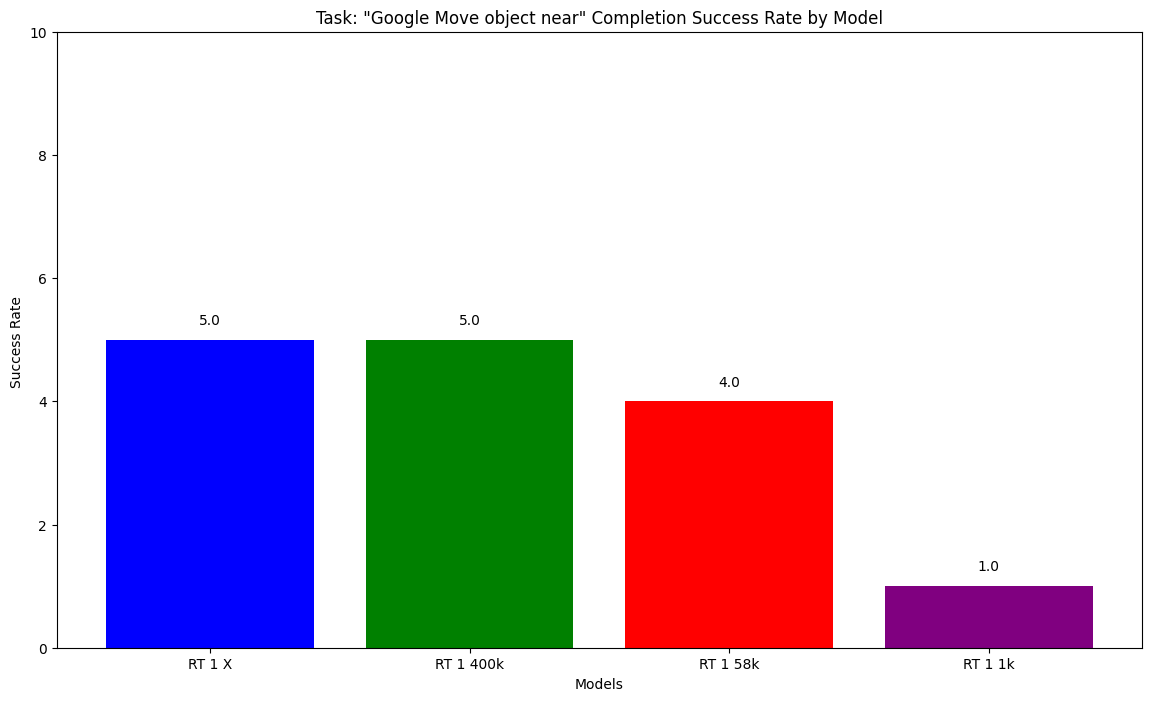

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for four models (replace these with your actual data)
model_1_success = google_robot_move_near_rt_1_x_success
model_2_success = google_robot_move_near_rt_1_400k_success
model_3_success = google_robot_move_near_rt_1_58k_success
model_4_success = google_robot_move_near_rt_1_1k_success

# List of model names and their success data
models = {
    'RT 1 X': model_1_success,
    'RT 1 400k': model_2_success,
    'RT 1 58k': model_3_success,
    'RT 1 1k': model_4_success
}

# Calculate success rates and scale them to a range of 0-10
model_names = []
success_rates = []

for model_name, success_data in models.items():
    success_rate = np.mean(success_data) * 10  # Scale success rate to 0-10
    model_names.append(model_name)
    success_rates.append(success_rate)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, success_rates, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Task: "Google Move object near" Completion Success Rate by Model')
plt.xlabel('Models')
plt.ylabel('Success Rate ')
plt.ylim(0, 10)  # Success rate ranges from 0 to 10

# Annotate bars with success rate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()


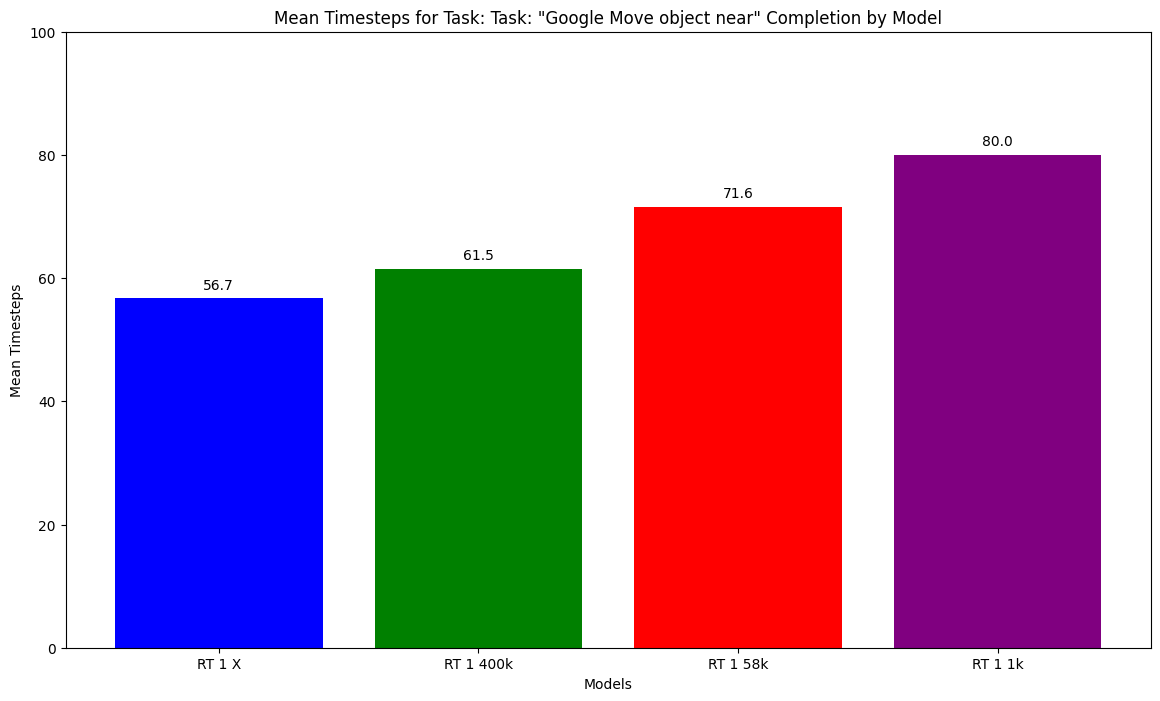

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Example timestep data for four models (replace these with your actual data)
model_1_timesteps = google_robot_move_near_rt_1_x_timesteps
model_2_timesteps = google_robot_move_near_rt_1_400k_timesteps
model_3_timesteps = google_robot_move_near_rt_1_58k_timesteps
model_4_timesteps = google_robot_move_near_rt_1_1k_timesteps

# List of model names and their timesteps data
models_timesteps = {
    'RT 1 X': model_1_timesteps,
    'RT 1 400k': model_2_timesteps,
    'RT 1 58k': model_3_timesteps,
    'RT 1 1k': model_4_timesteps
}

# Calculate mean timesteps
model_names = []
mean_timesteps = []

for model_name, timesteps_data in models_timesteps.items():
    mean_timestep = np.mean(timesteps_data)
    model_names.append(model_name)
    mean_timesteps.append(mean_timestep)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, mean_timesteps, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Mean Timesteps for Task: Task: "Google Move object near" Completion by Model')
plt.xlabel('Models')
plt.ylabel('Mean Timesteps')
plt.ylim(0, max(mean_timesteps) + 20)  # Adjust ylim to fit the highest mean timestep

# Annotate bars with mean timestep values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()


In [39]:
# @title Select your model and environment

task_name = "google_robot_open_drawer"  # @param ["google_robot_pick_coke_can", "google_robot_move_near", "google_robot_open_drawer", "google_robot_close_drawer", "widowx_spoon_on_towel", "widowx_carrot_on_plate", "widowx_stack_cube", "widowx_put_eggplant_in_basket"]

if 'env' in locals():
  print("Closing existing env")
  env.close()
  del env
env = simpler_env.make(task_name)

# Note: we turned off the denoiser as the colab kernel will crash if it's turned on
# To use the denoiser, please git clone our SIMPLER environments
# and perform evaluations locally.
sapien.render_config.rt_use_denoiser = False

obs, reset_info = env.reset()
instruction = env.get_language_instruction()
print("Reset info", reset_info)
print("Instruction", instruction)

if "google" in task_name:
  policy_setup = "google_robot"
else:
  policy_setup = "widowx_bridge"

Closing existing env
Reset info {'scene_name': 'dummy_drawer', 'scene_offset': None, 'scene_pose': None, 'scene_table_height': 0.87, 'urdf_version': 'recolor_tabletop_visual_matching_2', 'rgb_overlay_path': '/content/ManiSkill2_real2sim/data/real_inpainting/open_drawer_a0.png', 'rgb_overlay_cameras': ['overhead_camera'], 'rgb_overlay_mode': 'background', 'disable_bad_material': True, 'drawer_pose_wrt_robot_base': Pose([0.947, 0.00899999, 0.36095], [0, 3.72529e-09, 0, -1]), 'cabinet_pose_wrt_robot_base': Pose([0.947, 0.00899999, -0.0620503], [0, 0, 0, -1]), 'station_name': 'mk_station_recolor', 'light_mode': 'simple'}
Instruction open middle drawer


In [40]:
#@title Run inference google_robot_open_drawer_rt_1_x
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_x"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_open_drawer_rt_1_x_success = []
google_robot_open_drawer_rt_1_x_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_open_drawer_rt_1_x_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_open_drawer_rt_1_x_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_open_drawer_rt_1_x_success),
    f"({np.sum(google_robot_open_drawer_rt_1_x_success)}/{len(google_robot_open_drawer_rt_1_x_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_open_drawer_rt_1_x_timesteps),
    f"({np.sum(google_robot_open_drawer_rt_1_x_timesteps)}/{len(google_robot_open_drawer_rt_1_x_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

open top drawer
Episode 0 success: True
Episode 0 Timesteps: 113 Stats: OrderedDict([('qpos', '0.250')])
open top drawer
Episode 1 success: False
Episode 1 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open top drawer
Episode 2 success: False
Episode 2 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open middle drawer
Episode 3 success: False
Episode 3 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open middle drawer
Episode 4 success: False
Episode 4 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open top drawer
Episode 5 success: False
Episode 5 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open bottom drawer
Episode 6 success: False
Episode 6 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open bottom drawer
Episode 7 success: False
Episode 7 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open bottom drawer
Episode 8 success: True
Episode 8 Timesteps: 113 Stats: OrderedDict([('qpos', '0.152')])
open middle drawer
Episode 9 succ

In [41]:
#@title Run inference google_robot_open_drawer_rt_1_400k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_400k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_open_drawer_rt_1_400k_success = []
google_robot_open_drawer_rt_1_400k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_open_drawer_rt_1_400k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_open_drawer_rt_1_400k_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_open_drawer_rt_1_400k_success),
    f"({np.sum(google_robot_open_drawer_rt_1_400k_success)}/{len(google_robot_open_drawer_rt_1_400k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_open_drawer_rt_1_400k_timesteps),
    f"({np.sum(google_robot_open_drawer_rt_1_400k_timesteps)}/{len(google_robot_open_drawer_rt_1_400k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

open bottom drawer
Episode 0 success: False
Episode 0 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open middle drawer
Episode 1 success: True
Episode 1 Timesteps: 55 Stats: OrderedDict([('qpos', '0.287')])
open bottom drawer
Episode 2 success: False
Episode 2 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open middle drawer
Episode 3 success: True
Episode 3 Timesteps: 113 Stats: OrderedDict([('qpos', '0.200')])
open middle drawer
Episode 4 success: True
Episode 4 Timesteps: 56 Stats: OrderedDict([('qpos', '0.278')])
open top drawer
Episode 5 success: False
Episode 5 Timesteps: 37 Stats: OrderedDict([('qpos', '0.118')])
open top drawer
Episode 6 success: False
Episode 6 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open middle drawer
Episode 7 success: False
Episode 7 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open bottom drawer
Episode 8 success: False
Episode 8 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open middle drawer
Episode 9 su

In [42]:
#@title Run inference google_robot_open_drawer_rt_1_58k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_58k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_open_drawer_rt_1_58k_success = []
google_robot_open_drawer_rt_1_58k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_open_drawer_rt_1_58k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_open_drawer_rt_1_58k_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_open_drawer_rt_1_58k_success),
    f"({np.sum(google_robot_open_drawer_rt_1_58k_success)}/{len(google_robot_open_drawer_rt_1_58k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_open_drawer_rt_1_58k_timesteps),
    f"({np.sum(google_robot_open_drawer_rt_1_58k_timesteps)}/{len(google_robot_open_drawer_rt_1_58k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

open middle drawer
Episode 0 success: True
Episode 0 Timesteps: 113 Stats: OrderedDict([('qpos', '0.184')])
open top drawer
Episode 1 success: False
Episode 1 Timesteps: 113 Stats: OrderedDict([('qpos', '0.110')])
open bottom drawer
Episode 2 success: False
Episode 2 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open top drawer
Episode 3 success: False
Episode 3 Timesteps: 113 Stats: OrderedDict([('qpos', '0.069')])
open middle drawer
Episode 4 success: True
Episode 4 Timesteps: 113 Stats: OrderedDict([('qpos', '0.228')])
open top drawer
Episode 5 success: True
Episode 5 Timesteps: 113 Stats: OrderedDict([('qpos', '0.169')])
open top drawer
Episode 6 success: True
Episode 6 Timesteps: 113 Stats: OrderedDict([('qpos', '0.196')])
open middle drawer
Episode 7 success: False
Episode 7 Timesteps: 113 Stats: OrderedDict([('qpos', '0.085')])
open top drawer
Episode 8 success: False
Episode 8 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open bottom drawer
Episode 9 success: 

In [43]:
#@title Run inference google_robot_open_drawer_rt_1_1k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_1k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_open_drawer_rt_1_1k_success = []
google_robot_open_drawer_rt_1_1k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_open_drawer_rt_1_1k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_open_drawer_rt_1_1k_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_open_drawer_rt_1_1k_success),
    f"({np.sum(google_robot_open_drawer_rt_1_1k_success)}/{len(google_robot_open_drawer_rt_1_1k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_open_drawer_rt_1_1k_timesteps),
    f"({np.sum(google_robot_open_drawer_rt_1_1k_timesteps)}/{len(google_robot_open_drawer_rt_1_1k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

open middle drawer
Episode 0 success: False
Episode 0 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open bottom drawer
Episode 1 success: False
Episode 1 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open top drawer
Episode 2 success: False
Episode 2 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open bottom drawer
Episode 3 success: False
Episode 3 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open top drawer
Episode 4 success: False
Episode 4 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open top drawer
Episode 5 success: False
Episode 5 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open middle drawer
Episode 6 success: False
Episode 6 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open middle drawer
Episode 7 success: False
Episode 7 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open top drawer
Episode 8 success: False
Episode 8 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
open bottom drawer
Episode 9 su

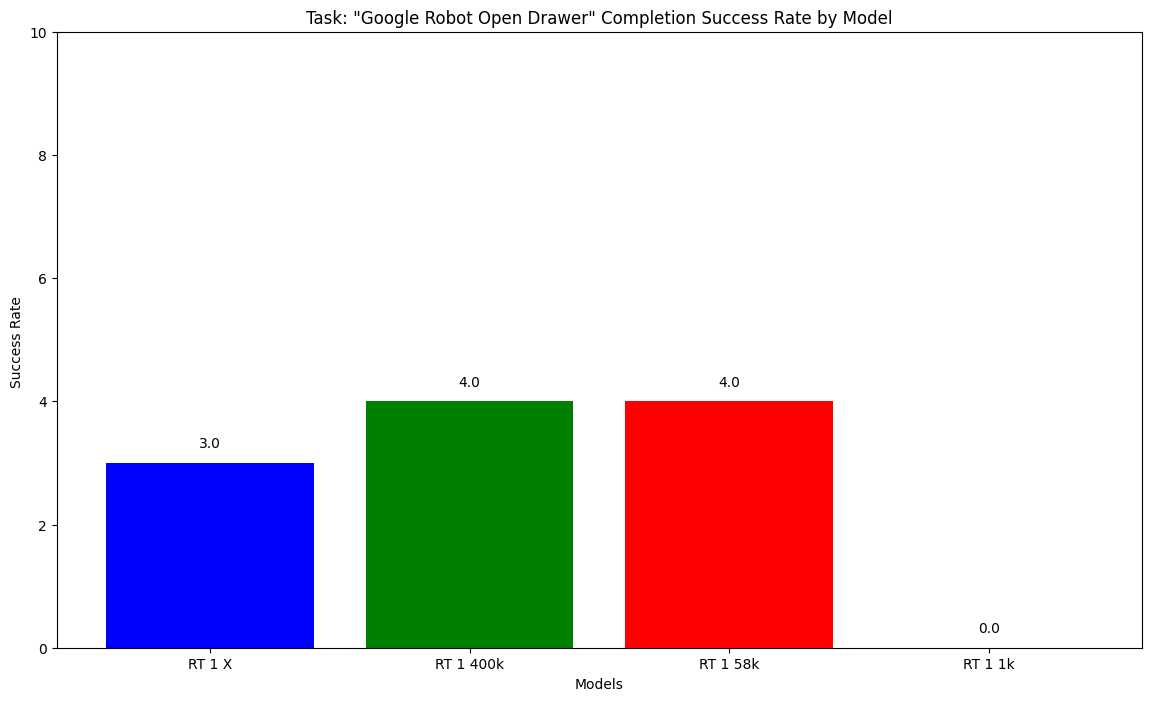

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for four models (replace these with your actual data)
model_1_success = google_robot_open_drawer_rt_1_x_success
model_2_success = google_robot_open_drawer_rt_1_400k_success
model_3_success = google_robot_open_drawer_rt_1_58k_success
model_4_success = google_robot_open_drawer_rt_1_1k_success

# List of model names and their success data
models = {
    'RT 1 X': model_1_success,
    'RT 1 400k': model_2_success,
    'RT 1 58k': model_3_success,
    'RT 1 1k': model_4_success
}

# Calculate success rates and scale them to a range of 0-10
model_names = []
success_rates = []

for model_name, success_data in models.items():
    success_rate = np.mean(success_data) * 10  # Scale success rate to 0-10
    model_names.append(model_name)
    success_rates.append(success_rate)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, success_rates, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Task: "Google Robot Open Drawer" Completion Success Rate by Model')
plt.xlabel('Models')
plt.ylabel('Success Rate ')
plt.ylim(0, 10)  # Success rate ranges from 0 to 10

# Annotate bars with success rate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()


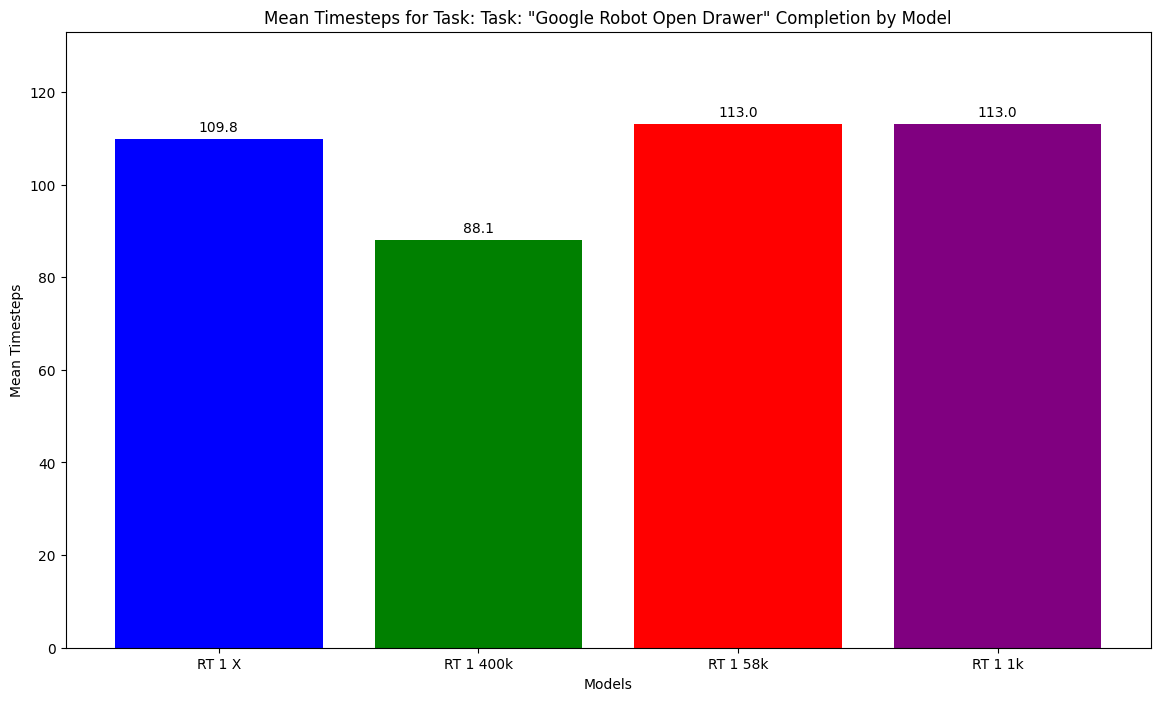

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Example timestep data for four models (replace these with your actual data)
model_1_timesteps = google_robot_open_drawer_rt_1_x_timesteps
model_2_timesteps = google_robot_open_drawer_rt_1_400k_timesteps
model_3_timesteps = google_robot_open_drawer_rt_1_58k_timesteps
model_4_timesteps = google_robot_open_drawer_rt_1_1k_timesteps

# List of model names and their timesteps data
models_timesteps = {
    'RT 1 X': model_1_timesteps,
    'RT 1 400k': model_2_timesteps,
    'RT 1 58k': model_3_timesteps,
    'RT 1 1k': model_4_timesteps
}

# Calculate mean timesteps
model_names = []
mean_timesteps = []

for model_name, timesteps_data in models_timesteps.items():
    mean_timestep = np.mean(timesteps_data)
    model_names.append(model_name)
    mean_timesteps.append(mean_timestep)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, mean_timesteps, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Mean Timesteps for Task: Task: "Google Robot Open Drawer" Completion by Model')
plt.xlabel('Models')
plt.ylabel('Mean Timesteps')
plt.ylim(0, max(mean_timesteps) + 20)  # Adjust ylim to fit the highest mean timestep

# Annotate bars with mean timestep values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()


In [46]:
# @title Select your model and environment

task_name = "google_robot_close_drawer"  # @param ["google_robot_pick_coke_can", "google_robot_move_near", "google_robot_open_drawer", "google_robot_close_drawer", "widowx_spoon_on_towel", "widowx_carrot_on_plate", "widowx_stack_cube", "widowx_put_eggplant_in_basket"]

if 'env' in locals():
  print("Closing existing env")
  env.close()
  del env
env = simpler_env.make(task_name)

# Note: we turned off the denoiser as the colab kernel will crash if it's turned on
# To use the denoiser, please git clone our SIMPLER environments
# and perform evaluations locally.
sapien.render_config.rt_use_denoiser = False

obs, reset_info = env.reset()
instruction = env.get_language_instruction()
print("Reset info", reset_info)
print("Instruction", instruction)

if "google" in task_name:
  policy_setup = "google_robot"
else:
  policy_setup = "widowx_bridge"

Closing existing env
Reset info {'scene_name': 'dummy_drawer', 'scene_offset': None, 'scene_pose': None, 'scene_table_height': 0.87, 'urdf_version': 'recolor_tabletop_visual_matching_2', 'rgb_overlay_path': '/content/ManiSkill2_real2sim/data/real_inpainting/open_drawer_a0.png', 'rgb_overlay_cameras': ['overhead_camera'], 'rgb_overlay_mode': 'background', 'disable_bad_material': True, 'drawer_pose_wrt_robot_base': Pose([0.747, 0.00899999, 0.36095], [0, 3.72529e-09, 0, -1]), 'cabinet_pose_wrt_robot_base': Pose([0.947, 0.00899999, -0.0620503], [0, 0, 0, -1]), 'station_name': 'mk_station_recolor', 'light_mode': 'simple'}
Instruction close middle drawer


In [47]:
#@title Run inference google_robot_close_drawer_rt_1_x
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_x"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_close_drawer_rt_1_x_success = []
google_robot_close_drawer_rt_1_x_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_close_drawer_rt_1_x_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_close_drawer_rt_1_x_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_close_drawer_rt_1_x_success),
    f"({np.sum(google_robot_close_drawer_rt_1_x_success)}/{len(google_robot_close_drawer_rt_1_x_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_close_drawer_rt_1_x_timesteps),
    f"({np.sum(google_robot_close_drawer_rt_1_x_timesteps)}/{len(google_robot_close_drawer_rt_1_x_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

close top drawer
Episode 0 success: True
Episode 0 Timesteps: 35 Stats: OrderedDict([('qpos', '0.025')])
close top drawer
Episode 1 success: False
Episode 1 Timesteps: 113 Stats: OrderedDict([('qpos', '0.200')])
close top drawer
Episode 2 success: False
Episode 2 Timesteps: 113 Stats: OrderedDict([('qpos', '0.057')])
close middle drawer
Episode 3 success: True
Episode 3 Timesteps: 107 Stats: OrderedDict([('qpos', '0.038')])
close middle drawer
Episode 4 success: True
Episode 4 Timesteps: 87 Stats: OrderedDict([('qpos', '0.018')])
close top drawer
Episode 5 success: False
Episode 5 Timesteps: 113 Stats: OrderedDict([('qpos', '0.200')])
close bottom drawer
Episode 6 success: True
Episode 6 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
close bottom drawer
Episode 7 success: False
Episode 7 Timesteps: 113 Stats: OrderedDict([('qpos', '0.135')])
close bottom drawer
Episode 8 success: False
Episode 8 Timesteps: 106 Stats: OrderedDict([('qpos', '0.219')])
close middle drawer
Episode 

In [48]:
#@title Run inference google_robot_close_drawer_rt_1_400k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_400k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_close_drawer_rt_1_400k_success = []
google_robot_close_drawer_rt_1_400k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_close_drawer_rt_1_400k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_close_drawer_rt_1_400k_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_close_drawer_rt_1_400k_success),
    f"({np.sum(google_robot_close_drawer_rt_1_400k_success)}/{len(google_robot_close_drawer_rt_1_400k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_close_drawer_rt_1_400k_timesteps),
    f"({np.sum(google_robot_close_drawer_rt_1_400k_timesteps)}/{len(google_robot_close_drawer_rt_1_400k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

close bottom drawer
Episode 0 success: False
Episode 0 Timesteps: 113 Stats: OrderedDict([('qpos', '0.145')])
close middle drawer
Episode 1 success: True
Episode 1 Timesteps: 35 Stats: OrderedDict([('qpos', '0.000')])
close bottom drawer
Episode 2 success: False
Episode 2 Timesteps: 113 Stats: OrderedDict([('qpos', '0.101')])
close middle drawer
Episode 3 success: True
Episode 3 Timesteps: 30 Stats: OrderedDict([('qpos', '0.000')])
close middle drawer
Episode 4 success: True
Episode 4 Timesteps: 33 Stats: OrderedDict([('qpos', '0.000')])
close top drawer
Episode 5 success: True
Episode 5 Timesteps: 26 Stats: OrderedDict([('qpos', '0.000')])
close top drawer
Episode 6 success: True
Episode 6 Timesteps: 43 Stats: OrderedDict([('qpos', '0.007')])
close middle drawer
Episode 7 success: False
Episode 7 Timesteps: 113 Stats: OrderedDict([('qpos', '0.061')])
close bottom drawer
Episode 8 success: True
Episode 8 Timesteps: 56 Stats: OrderedDict([('qpos', '0.000')])
close middle drawer
Episode 

In [49]:
#@title Run inference google_robot_close_drawer_rt_1_58k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_58k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_close_drawer_rt_1_58k_success = []
google_robot_close_drawer_rt_1_58k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_close_drawer_rt_1_58k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_close_drawer_rt_1_58k_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_close_drawer_rt_1_58k_success),
    f"({np.sum(google_robot_close_drawer_rt_1_58k_success)}/{len(google_robot_close_drawer_rt_1_58k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_close_drawer_rt_1_58k_timesteps),
    f"({np.sum(google_robot_close_drawer_rt_1_58k_timesteps)}/{len(google_robot_close_drawer_rt_1_58k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

close middle drawer
Episode 0 success: True
Episode 0 Timesteps: 113 Stats: OrderedDict([('qpos', '0.001')])
close top drawer
Episode 1 success: True
Episode 1 Timesteps: 113 Stats: OrderedDict([('qpos', '0.006')])
close bottom drawer
Episode 2 success: False
Episode 2 Timesteps: 113 Stats: OrderedDict([('qpos', '0.096')])
close top drawer
Episode 3 success: False
Episode 3 Timesteps: 113 Stats: OrderedDict([('qpos', '0.148')])
close middle drawer
Episode 4 success: False
Episode 4 Timesteps: 113 Stats: OrderedDict([('qpos', '0.078')])
close top drawer
Episode 5 success: False
Episode 5 Timesteps: 113 Stats: OrderedDict([('qpos', '0.061')])
close top drawer
Episode 6 success: False
Episode 6 Timesteps: 113 Stats: OrderedDict([('qpos', '0.200')])
close middle drawer
Episode 7 success: True
Episode 7 Timesteps: 113 Stats: OrderedDict([('qpos', '0.000')])
close top drawer
Episode 8 success: False
Episode 8 Timesteps: 113 Stats: OrderedDict([('qpos', '0.197')])
close bottom drawer
Episode 

In [51]:
#@title Run inference google_robot_close_drawer_rt_1_1k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_1k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
google_robot_close_drawer_rt_1_1k_success = []
google_robot_close_drawer_rt_1_1k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  google_robot_close_drawer_rt_1_1k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  google_robot_close_drawer_rt_1_1k_success.append(success)
print(
    "**Overall Success**",
    np.mean(google_robot_close_drawer_rt_1_1k_success),
    f"({np.sum(google_robot_close_drawer_rt_1_1k_success)}/{len(google_robot_close_drawer_rt_1_1k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(google_robot_close_drawer_rt_1_1k_timesteps),
    f"({np.sum(google_robot_close_drawer_rt_1_1k_timesteps)}/{len(google_robot_close_drawer_rt_1_1k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

close top drawer
Episode 0 success: False
Episode 0 Timesteps: 113 Stats: OrderedDict([('qpos', '0.077')])
close bottom drawer
Episode 1 success: False
Episode 1 Timesteps: 113 Stats: OrderedDict([('qpos', '0.200')])
close middle drawer
Episode 2 success: False
Episode 2 Timesteps: 113 Stats: OrderedDict([('qpos', '0.200')])
close middle drawer
Episode 3 success: False
Episode 3 Timesteps: 113 Stats: OrderedDict([('qpos', '0.200')])
close middle drawer
Episode 4 success: False
Episode 4 Timesteps: 113 Stats: OrderedDict([('qpos', '0.200')])
close top drawer
Episode 5 success: False
Episode 5 Timesteps: 113 Stats: OrderedDict([('qpos', '0.083')])
close bottom drawer
Episode 6 success: True
Episode 6 Timesteps: 113 Stats: OrderedDict([('qpos', '0.036')])
close bottom drawer
Episode 7 success: True
Episode 7 Timesteps: 113 Stats: OrderedDict([('qpos', '0.036')])
close middle drawer
Episode 8 success: False
Episode 8 Timesteps: 113 Stats: OrderedDict([('qpos', '0.108')])
close middle drawe

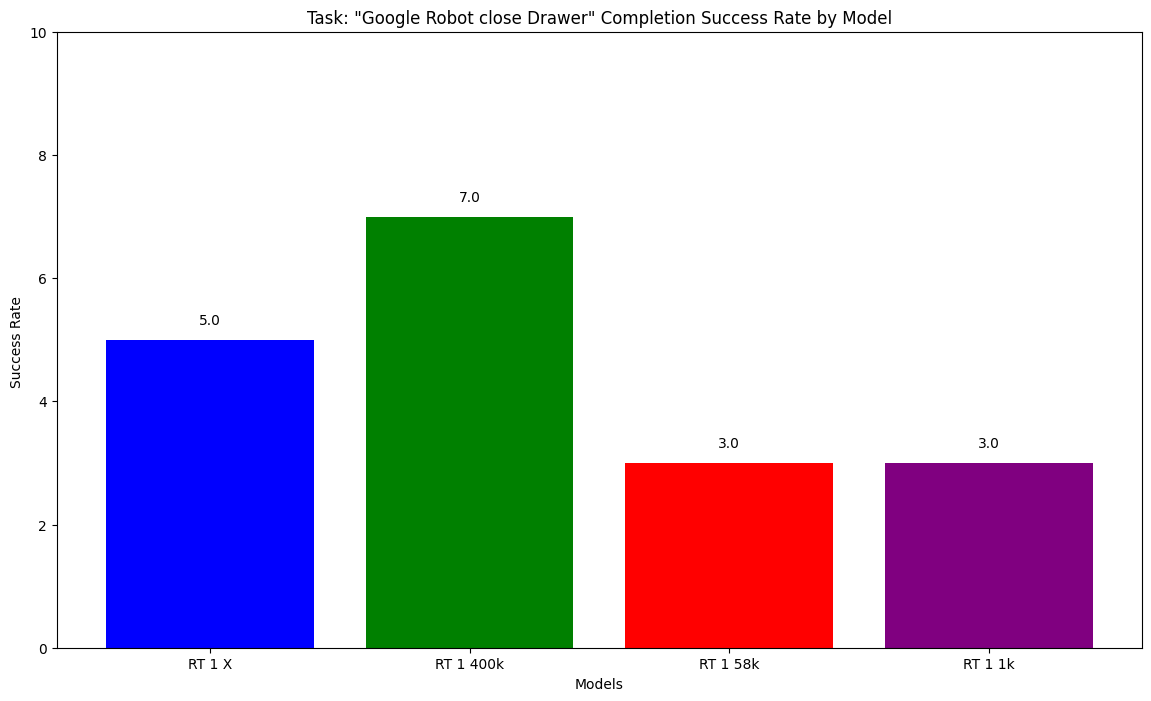

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for four models (replace these with your actual data)
model_1_success = google_robot_close_drawer_rt_1_x_success
model_2_success = google_robot_close_drawer_rt_1_400k_success
model_3_success = google_robot_close_drawer_rt_1_58k_success
model_4_success = google_robot_close_drawer_rt_1_1k_success

# List of model names and their success data
models = {
    'RT 1 X': model_1_success,
    'RT 1 400k': model_2_success,
    'RT 1 58k': model_3_success,
    'RT 1 1k': model_4_success
}

# Calculate success rates and scale them to a range of 0-10
model_names = []
success_rates = []

for model_name, success_data in models.items():
    success_rate = np.mean(success_data) * 10  # Scale success rate to 0-10
    model_names.append(model_name)
    success_rates.append(success_rate)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, success_rates, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Task: "Google Robot close Drawer" Completion Success Rate by Model')
plt.xlabel('Models')
plt.ylabel('Success Rate ')
plt.ylim(0, 10)  # Success rate ranges from 0 to 10

# Annotate bars with success rate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()




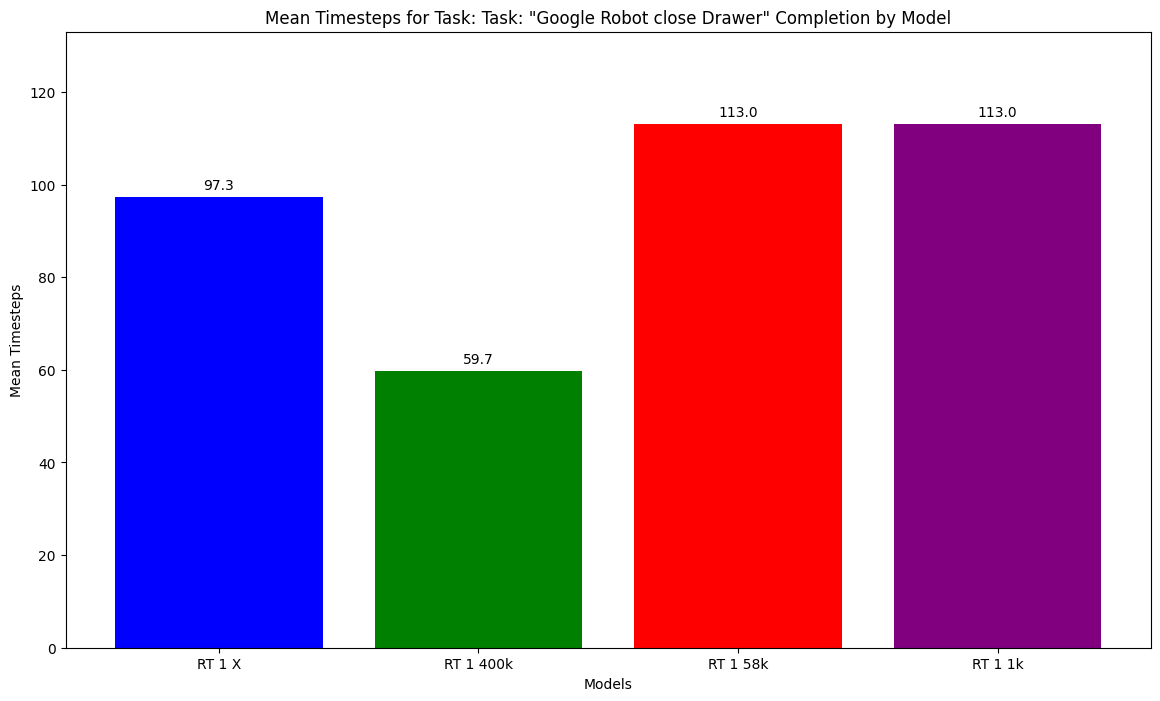

In [53]:

import matplotlib.pyplot as plt
import numpy as np

# Example timestep data for four models (replace these with your actual data)
model_1_timesteps = google_robot_close_drawer_rt_1_x_timesteps
model_2_timesteps = google_robot_close_drawer_rt_1_400k_timesteps
model_3_timesteps = google_robot_close_drawer_rt_1_58k_timesteps
model_4_timesteps = google_robot_close_drawer_rt_1_1k_timesteps

# List of model names and their timesteps data
models_timesteps = {
    'RT 1 X': model_1_timesteps,
    'RT 1 400k': model_2_timesteps,
    'RT 1 58k': model_3_timesteps,
    'RT 1 1k': model_4_timesteps
}

# Calculate mean timesteps
model_names = []
mean_timesteps = []

for model_name, timesteps_data in models_timesteps.items():
    mean_timestep = np.mean(timesteps_data)
    model_names.append(model_name)
    mean_timesteps.append(mean_timestep)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, mean_timesteps, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Mean Timesteps for Task: Task: "Google Robot close Drawer" Completion by Model')
plt.xlabel('Models')
plt.ylabel('Mean Timesteps')
plt.ylim(0, max(mean_timesteps) + 20)  # Adjust ylim to fit the highest mean timestep

# Annotate bars with mean timestep values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()

In [54]:
# @title Select your model and environment

task_name = "widowx_spoon_on_towel"  # @param ["google_robot_pick_coke_can", "google_robot_move_near", "google_robot_open_drawer", "google_robot_close_drawer", "widowx_spoon_on_towel", "widowx_carrot_on_plate", "widowx_stack_cube", "widowx_put_eggplant_in_basket"]

if 'env' in locals():
  print("Closing existing env")
  env.close()
  del env
env = simpler_env.make(task_name)

# Note: we turned off the denoiser as the colab kernel will crash if it's turned on
# To use the denoiser, please git clone our SIMPLER environments
# and perform evaluations locally.
sapien.render_config.rt_use_denoiser = False

obs, reset_info = env.reset()
instruction = env.get_language_instruction()
print("Reset info", reset_info)
print("Instruction", instruction)

if "google" in task_name:
  policy_setup = "google_robot"
else:
  policy_setup = "widowx_bridge"

Closing existing env
Reset info {'scene_name': 'bridge_table_1_v1', 'scene_offset': None, 'scene_pose': None, 'scene_table_height': 0.87, 'urdf_version': '', 'rgb_overlay_path': '/content/ManiSkill2_real2sim/data/real_inpainting/bridge_real_eval_1.png', 'rgb_overlay_cameras': ['3rd_view_camera'], 'rgb_overlay_mode': 'background', 'disable_bad_material': False, 'episode_model_ids': ['bridge_spoon_generated_modified', 'table_cloth_generated_shorter'], 'episode_model_scales': [1.0, 1.0], 'episode_source_obj_name': 'bridge_spoon_generated_modified', 'episode_target_obj_name': 'table_cloth_generated_shorter', 'episode_source_obj_init_pose_wrt_robot_base': Pose([0.381813, 0.103459, 0.00993758], [0.706397, -0.0110179, -0.019864, -0.707451]), 'episode_target_obj_init_pose_wrt_robot_base': Pose([0.382, -0.0469939, 0.00441325], [1.73036e-06, -1.54949e-06, -0.000699929, -1]), 'episode_id': 1}
Instruction put the spoon on the towel


In [55]:
#@title Run inference widowx_spoon_on_towel_rt_1_x
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_x"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_spoon_on_towel_rt_1_x_success = []
widowx_spoon_on_towel_rt_1_x_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  widowx_spoon_on_towel_rt_1_x_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_spoon_on_towel_rt_1_x_success.append(success)
print(
    "**Overall Success**",
    np.mean(widowx_spoon_on_towel_rt_1_x_success),
    f"({np.sum(widowx_spoon_on_towel_rt_1_x_success)}/{len(widowx_spoon_on_towel_rt_1_x_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_spoon_on_towel_rt_1_x_timesteps),
    f"({np.sum(widowx_spoon_on_towel_rt_1_x_timesteps)}/{len(widowx_spoon_on_towel_rt_1_x_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

put the spoon on the towel
Episode 0 success: False
Episode 0 Timesteps: 15 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 1 success: False
Episode 1 Timesteps: 58 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 2 success: False
Episode 2 Timesteps: 16 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 3 success: False
Episode 3 Timesteps: 20 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episo

In [56]:
#@title Run inference widowx_spoon_on_towel_rt_1_400k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_400k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_spoon_on_towel_rt_1_400k_success = []
widowx_spoon_on_towel_rt_1_400k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  widowx_spoon_on_towel_rt_1_400k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_spoon_on_towel_rt_1_400k_success.append(success)
print(
    "**Overall Success**",
    np.mean(widowx_spoon_on_towel_rt_1_400k_success),
    f"({np.sum(widowx_spoon_on_towel_rt_1_400k_success)}/{len(widowx_spoon_on_towel_rt_1_400k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_spoon_on_towel_rt_1_400k_timesteps),
    f"({np.sum(widowx_spoon_on_towel_rt_1_400k_timesteps)}/{len(widowx_spoon_on_towel_rt_1_400k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

put the spoon on the towel
Episode 0 success: False
Episode 0 Timesteps: 6 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 1 success: False
Episode 1 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', True), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 2 success: False
Episode 2 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', True), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 3 success: False
Episode 3 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', True), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 4

In [57]:
#@title Run inference widowx_spoon_on_towel_rt_1_58k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_58k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_spoon_on_towel_rt_1_58k_success = []
widowx_spoon_on_towel_rt_1_58k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  widowx_spoon_on_towel_rt_1_58k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_spoon_on_towel_rt_1_58k_success.append(success)
print(
    "**Overall Success**",
    np.mean(widowx_spoon_on_towel_rt_1_58k_success),
    f"({np.sum(widowx_spoon_on_towel_rt_1_58k_success)}/{len(widowx_spoon_on_towel_rt_1_58k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_spoon_on_towel_rt_1_58k_timesteps),
    f"({np.sum(widowx_spoon_on_towel_rt_1_58k_timesteps)}/{len(widowx_spoon_on_towel_rt_1_58k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

put the spoon on the towel
Episode 0 success: False
Episode 0 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 1 success: False
Episode 1 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 2 success: False
Episode 2 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 3 success: False
Episode 3 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episo

In [58]:
#@title Run inference widowx_spoon_on_towel_rt_1_1k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_1k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_spoon_on_towel_rt_1_1k_success = []
widowx_spoon_on_towel_rt_1_1k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1
  widowx_spoon_on_towel_rt_1_1k_timesteps.append(timestep)
  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_spoon_on_towel_rt_1_1k_success.append(success)
print(
    "**Overall Success**",
    np.mean(widowx_spoon_on_towel_rt_1_1k_success),
    f"({np.sum(widowx_spoon_on_towel_rt_1_1k_success)}/{len(widowx_spoon_on_towel_rt_1_1k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_spoon_on_towel_rt_1_1k_timesteps),
    f"({np.sum(widowx_spoon_on_towel_rt_1_1k_timesteps)}/{len(widowx_spoon_on_towel_rt_1_1k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

put the spoon on the towel
Episode 0 success: False
Episode 0 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 1 success: False
Episode 1 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 2 success: False
Episode 2 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episode 3 success: False
Episode 3 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put the spoon on the towel
Episo

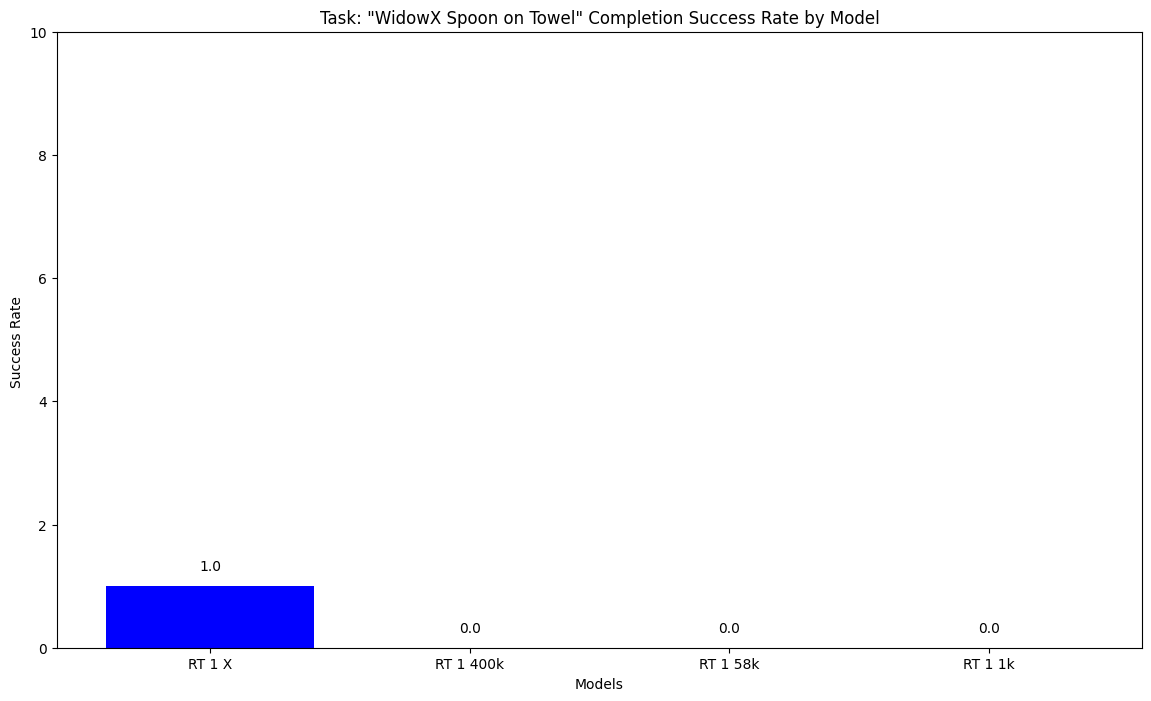

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for four models (replace these with your actual data)
model_1_success = widowx_spoon_on_towel_rt_1_x_success
model_2_success = widowx_spoon_on_towel_rt_1_400k_success
model_3_success = widowx_spoon_on_towel_rt_1_58k_success
model_4_success = widowx_spoon_on_towel_rt_1_1k_success

# List of model names and their success data
models = {
    'RT 1 X': model_1_success,
    'RT 1 400k': model_2_success,
    'RT 1 58k': model_3_success,
    'RT 1 1k': model_4_success
}

# Calculate success rates and scale them to a range of 0-10
model_names = []
success_rates = []

for model_name, success_data in models.items():
    success_rate = np.mean(success_data) * 10  # Scale success rate to 0-10
    model_names.append(model_name)
    success_rates.append(success_rate)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, success_rates, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Task: "WidowX Spoon on Towel" Completion Success Rate by Model')
plt.xlabel('Models')
plt.ylabel('Success Rate ')
plt.ylim(0, 10)  # Success rate ranges from 0 to 10

# Annotate bars with success rate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()




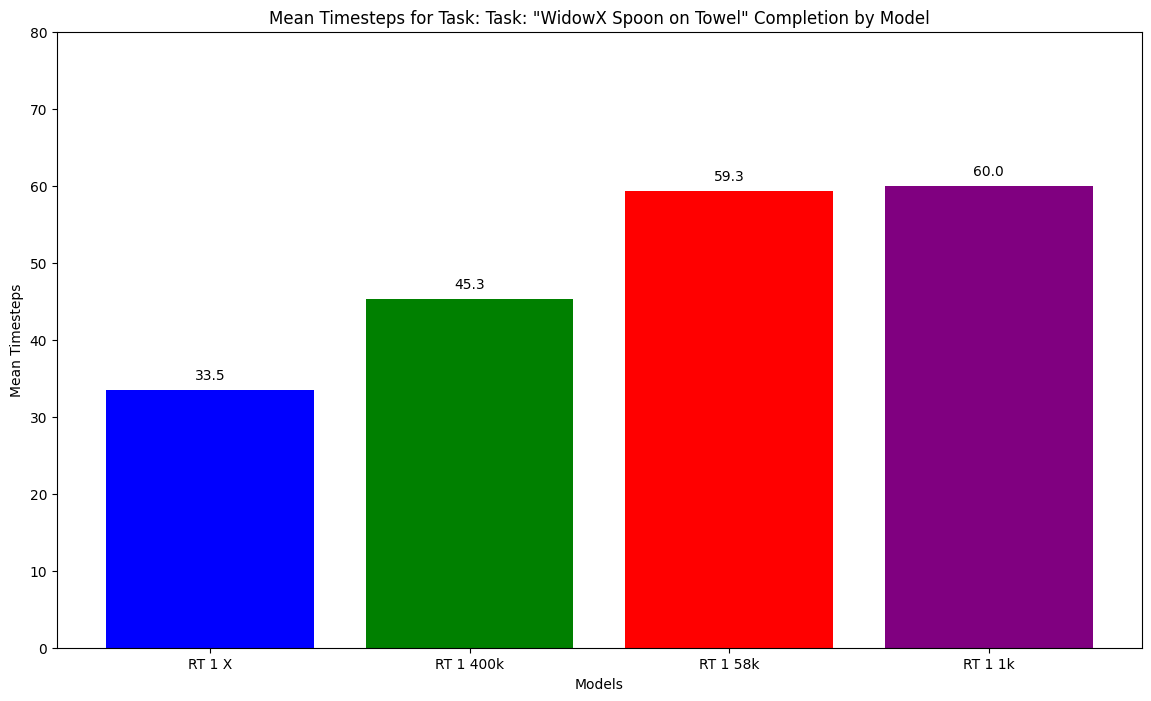

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Example timestep data for four models (replace these with your actual data)
model_1_timesteps = widowx_spoon_on_towel_rt_1_x_timesteps
model_2_timesteps = widowx_spoon_on_towel_rt_1_400k_timesteps
model_3_timesteps = widowx_spoon_on_towel_rt_1_58k_timesteps
model_4_timesteps = widowx_spoon_on_towel_rt_1_1k_timesteps

# List of model names and their timesteps data
models_timesteps = {
    'RT 1 X': model_1_timesteps,
    'RT 1 400k': model_2_timesteps,
    'RT 1 58k': model_3_timesteps,
    'RT 1 1k': model_4_timesteps
}

# Calculate mean timesteps
model_names = []
mean_timesteps = []

for model_name, timesteps_data in models_timesteps.items():
    mean_timestep = np.mean(timesteps_data)
    model_names.append(model_name)
    mean_timesteps.append(mean_timestep)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, mean_timesteps, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Mean Timesteps for Task: Task: "WidowX Spoon on Towel" Completion by Model')
plt.xlabel('Models')
plt.ylabel('Mean Timesteps')
plt.ylim(0, max(mean_timesteps) + 20)  # Adjust ylim to fit the highest mean timestep

# Annotate bars with mean timestep values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()


In [62]:
# @title Select your model and environment

task_name = "widowx_carrot_on_plate"  # @param ["google_robot_pick_coke_can", "google_robot_move_near", "google_robot_open_drawer", "google_robot_close_drawer", "widowx_spoon_on_towel", "widowx_carrot_on_plate", "widowx_stack_cube", "widowx_put_eggplant_in_basket"]

if 'env' in locals():
  print("Closing existing env")
  env.close()
  del env
env = simpler_env.make(task_name)

# Note: we turned off the denoiser as the colab kernel will crash if it's turned on
# To use the denoiser, please git clone our SIMPLER environments
# and perform evaluations locally.
sapien.render_config.rt_use_denoiser = False

obs, reset_info = env.reset()
instruction = env.get_language_instruction()
print("Reset info", reset_info)
print("Instruction", instruction)

if "google" in task_name:
  policy_setup = "google_robot"
else:
  policy_setup = "widowx_bridge"

Closing existing env
Reset info {'scene_name': 'bridge_table_1_v1', 'scene_offset': None, 'scene_pose': None, 'scene_table_height': 0.87, 'urdf_version': '', 'rgb_overlay_path': '/content/ManiSkill2_real2sim/data/real_inpainting/bridge_real_eval_1.png', 'rgb_overlay_cameras': ['3rd_view_camera'], 'rgb_overlay_mode': 'background', 'disable_bad_material': False, 'episode_model_ids': ['bridge_carrot_generated_modified', 'bridge_plate_objaverse_larger'], 'episode_model_scales': [1.0, 1.0], 'episode_source_obj_name': 'bridge_carrot_generated_modified', 'episode_target_obj_name': 'bridge_plate_objaverse_larger', 'episode_source_obj_init_pose_wrt_robot_base': Pose([0.381995, 0.104536, 0.0175282], [-0.706719, 0.0305475, -0.0305745, -0.706173]), 'episode_target_obj_init_pose_wrt_robot_base': Pose([0.382, -0.047, -0.000468433], [-6.55451e-07, -5.10228e-07, -1.6917e-06, -1]), 'episode_id': 1}
Instruction put carrot on plate


In [63]:
#@title Run inference widowx_carrot_on_plate_rt_1_x
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_x"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_carrot_on_plate_rt_1_x_success = []
widowx_carrot_on_plate_rt_1_x_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1

  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_carrot_on_plate_rt_1_x_success.append(success)
  widowx_carrot_on_plate_rt_1_x_timesteps.append(timestep)
print(
    "**Overall Success**",
    np.mean(widowx_carrot_on_plate_rt_1_x_success),
    f"({np.sum(widowx_carrot_on_plate_rt_1_x_success)}/{len(widowx_carrot_on_plate_rt_1_x_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_carrot_on_plate_rt_1_x_timesteps),
    f"({np.sum(widowx_carrot_on_plate_rt_1_x_timesteps)}/{len(widowx_carrot_on_plate_rt_1_x_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

put carrot on plate
Episode 0 success: False
Episode 0 Timesteps: 33 Stats: OrderedDict([('moved_correct_obj', True), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 1 success: False
Episode 1 Timesteps: 43 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 2 success: False
Episode 2 Timesteps: 26 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 3 success: False
Episode 3 Timesteps: 34 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 4 success: False
Episode 4 Timest

In [64]:
#@title Run inference widowx_carrot_on_plate_rt_1_400k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_400k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_carrot_on_plate_rt_1_400k_success = []
widowx_carrot_on_plate_rt_1_400k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1

  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_carrot_on_plate_rt_1_400k_success.append(success)
  widowx_carrot_on_plate_rt_1_400k_timesteps.append(timestep)
print(
    "**Overall Success**",
    np.mean(widowx_carrot_on_plate_rt_1_400k_success),
    f"({np.sum(widowx_carrot_on_plate_rt_1_400k_success)}/{len(widowx_carrot_on_plate_rt_1_400k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_carrot_on_plate_rt_1_400k_timesteps),
    f"({np.sum(widowx_carrot_on_plate_rt_1_400k_timesteps)}/{len(widowx_carrot_on_plate_rt_1_400k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

put carrot on plate
Episode 0 success: False
Episode 0 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 1 success: False
Episode 1 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 2 success: False
Episode 2 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 3 success: False
Episode 3 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 4 success: False
Episode 4 Times

In [65]:
#@title Run inference widowx_carrot_on_plate_rt_1_58k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_58k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_carrot_on_plate_rt_1_58k_success = []
widowx_carrot_on_plate_rt_1_58k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1

  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_carrot_on_plate_rt_1_58k_success.append(success)
  widowx_carrot_on_plate_rt_1_58k_timesteps.append(timestep)
print(
    "**Overall Success**",
    np.mean(widowx_carrot_on_plate_rt_1_58k_success),
    f"({np.sum(widowx_carrot_on_plate_rt_1_58k_success)}/{len(widowx_carrot_on_plate_rt_1_58k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_carrot_on_plate_rt_1_58k_timesteps),
    f"({np.sum(widowx_carrot_on_plate_rt_1_58k_timesteps)}/{len(widowx_carrot_on_plate_rt_1_58k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

put carrot on plate
Episode 0 success: False
Episode 0 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 1 success: False
Episode 1 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 2 success: False
Episode 2 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 3 success: False
Episode 3 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 4 success: False
Episode 4 Times

In [66]:
#@title Run inference widowx_carrot_on_plate_rt_1_1k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_1k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_carrot_on_plate_rt_1_1k_success = []
widowx_carrot_on_plate_rt_1_1k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1

  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_carrot_on_plate_rt_1_1k_success.append(success)
  widowx_carrot_on_plate_rt_1_1k_timesteps.append(timestep)
print(
    "**Overall Success**",
    np.mean(widowx_carrot_on_plate_rt_1_1k_success),
    f"({np.sum(widowx_carrot_on_plate_rt_1_1k_success)}/{len(widowx_carrot_on_plate_rt_1_1k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_carrot_on_plate_rt_1_1k_timesteps),
    f"({np.sum(widowx_carrot_on_plate_rt_1_1k_timesteps)}/{len(widowx_carrot_on_plate_rt_1_1k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

put carrot on plate
Episode 0 success: False
Episode 0 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 1 success: False
Episode 1 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 2 success: False
Episode 2 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 3 success: False
Episode 3 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put carrot on plate
Episode 4 success: False
Episode 4 Times

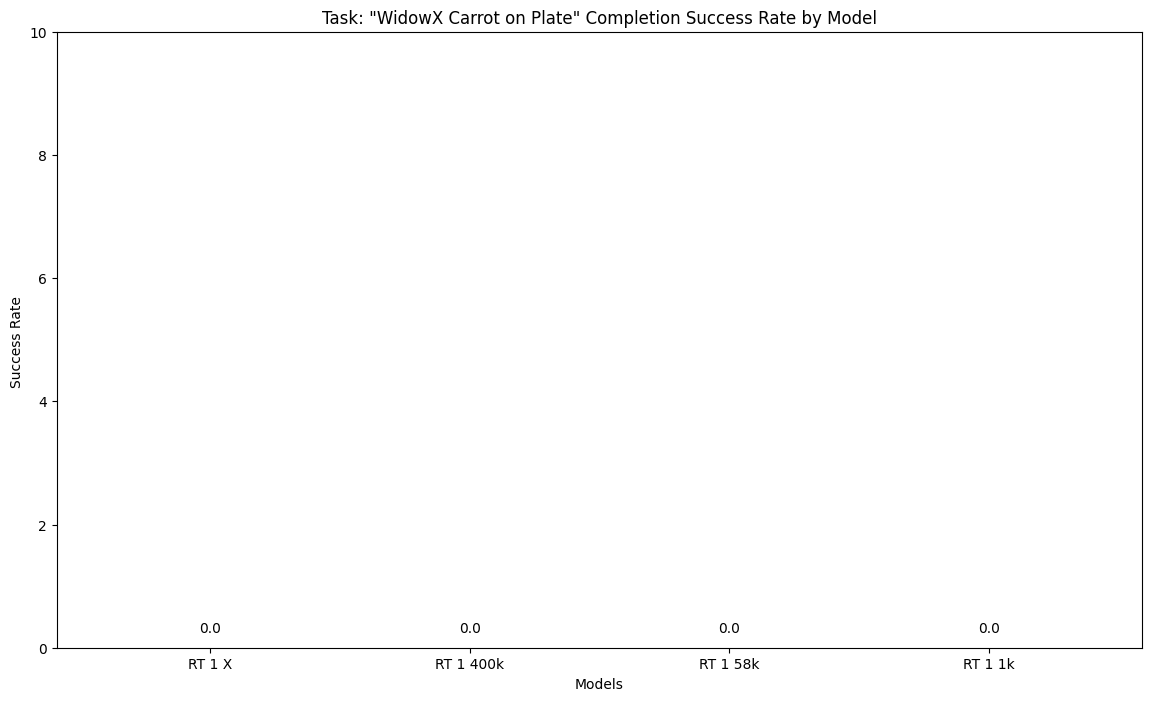

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for four models (replace these with your actual data)
model_1_success = widowx_carrot_on_plate_rt_1_x_success
model_2_success = widowx_carrot_on_plate_rt_1_400k_success
model_3_success = widowx_carrot_on_plate_rt_1_58k_success
model_4_success = widowx_carrot_on_plate_rt_1_1k_success

# List of model names and their success data
models = {
    'RT 1 X': model_1_success,
    'RT 1 400k': model_2_success,
    'RT 1 58k': model_3_success,
    'RT 1 1k': model_4_success
}

# Calculate success rates and scale them to a range of 0-10
model_names = []
success_rates = []

for model_name, success_data in models.items():
    success_rate = np.mean(success_data) * 10  # Scale success rate to 0-10
    model_names.append(model_name)
    success_rates.append(success_rate)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, success_rates, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Task: "WidowX Carrot on Plate" Completion Success Rate by Model')
plt.xlabel('Models')
plt.ylabel('Success Rate ')
plt.ylim(0, 10)  # Success rate ranges from 0 to 10

# Annotate bars with success rate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()




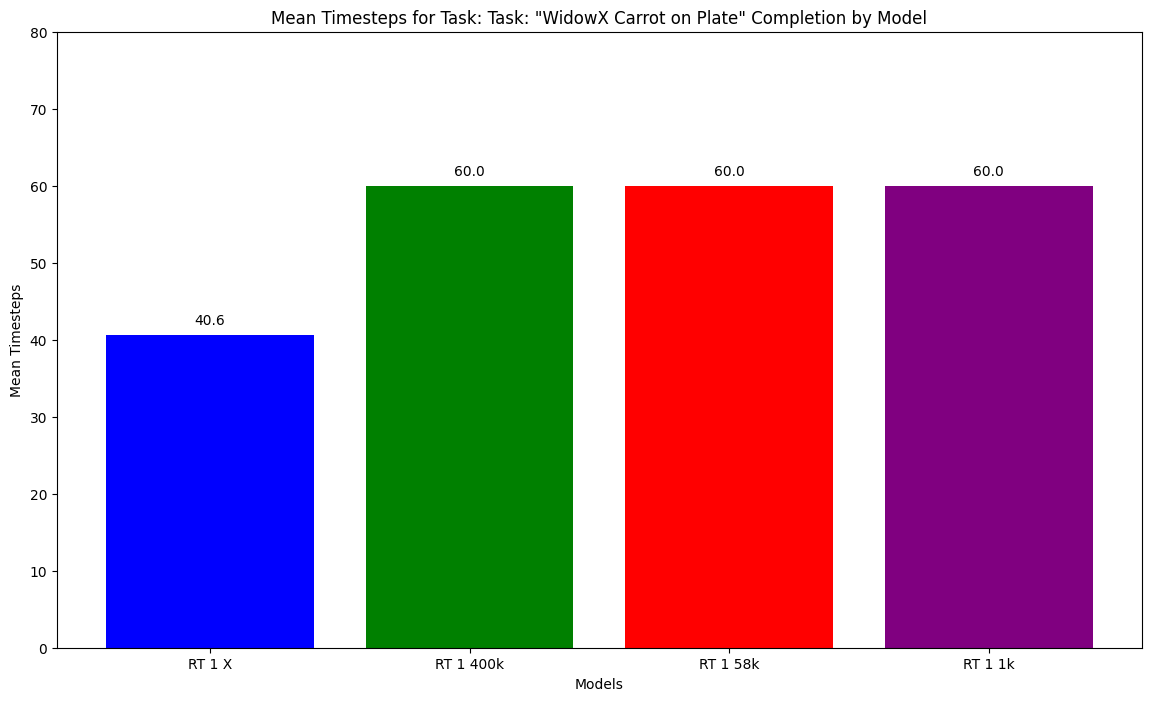

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Example timestep data for four models (replace these with your actual data)
model_1_timesteps = widowx_carrot_on_plate_rt_1_x_timesteps
model_2_timesteps = widowx_carrot_on_plate_rt_1_400k_timesteps
model_3_timesteps = widowx_carrot_on_plate_rt_1_58k_timesteps
model_4_timesteps = widowx_carrot_on_plate_rt_1_1k_timesteps

# List of model names and their timesteps data
models_timesteps = {
    'RT 1 X': model_1_timesteps,
    'RT 1 400k': model_2_timesteps,
    'RT 1 58k': model_3_timesteps,
    'RT 1 1k': model_4_timesteps
}

# Calculate mean timesteps
model_names = []
mean_timesteps = []

for model_name, timesteps_data in models_timesteps.items():
    mean_timestep = np.mean(timesteps_data)
    model_names.append(model_name)
    mean_timesteps.append(mean_timestep)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, mean_timesteps, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Mean Timesteps for Task: Task: "WidowX Carrot on Plate" Completion by Model')
plt.xlabel('Models')
plt.ylabel('Mean Timesteps')
plt.ylim(0, max(mean_timesteps) + 20)  # Adjust ylim to fit the highest mean timestep

# Annotate bars with mean timestep values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()


In [69]:
# @title Select your model and environment

task_name = "widowx_stack_cube"  # @param ["google_robot_pick_coke_can", "google_robot_move_near", "google_robot_open_drawer", "google_robot_close_drawer", "widowx_spoon_on_towel", "widowx_carrot_on_plate", "widowx_stack_cube", "widowx_put_eggplant_in_basket"]

if 'env' in locals():
  print("Closing existing env")
  env.close()
  del env
env = simpler_env.make(task_name)

# Note: we turned off the denoiser as the colab kernel will crash if it's turned on
# To use the denoiser, please git clone our SIMPLER environments
# and perform evaluations locally.
sapien.render_config.rt_use_denoiser = False

obs, reset_info = env.reset()
instruction = env.get_language_instruction()
print("Reset info", reset_info)
print("Instruction", instruction)

if "google" in task_name:
  policy_setup = "google_robot"
else:
  policy_setup = "widowx_bridge"

Closing existing env
Reset info {'scene_name': 'bridge_table_1_v1', 'scene_offset': None, 'scene_pose': None, 'scene_table_height': 0.87, 'urdf_version': '', 'rgb_overlay_path': '/content/ManiSkill2_real2sim/data/real_inpainting/bridge_real_eval_1.png', 'rgb_overlay_cameras': ['3rd_view_camera'], 'rgb_overlay_mode': 'background', 'disable_bad_material': False, 'episode_model_ids': ['baked_green_cube_3cm', 'baked_yellow_cube_3cm'], 'episode_model_scales': [1.0, 1.0], 'episode_source_obj_name': 'baked_green_cube_3cm', 'episode_target_obj_name': 'baked_yellow_cube_3cm', 'episode_source_obj_init_pose_wrt_robot_base': Pose([0.357027, 0.0779555, 0.0145314], [7.34558e-06, -5.85235e-07, 6.34019e-07, -1]), 'episode_target_obj_init_pose_wrt_robot_base': Pose([0.257028, 0.0779559, 0.0145315], [1.08844e-05, -5.46748e-07, 4.81744e-07, -1]), 'episode_id': 1}
Instruction stack the green block on the yellow block


In [70]:
#@title Run inference widowx_stack_cube_rt_1_x
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_x"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_stack_cube_rt_1_x_success = []
widowx_stack_cube_rt_1_x_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1

  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_stack_cube_rt_1_x_success.append(success)
  widowx_stack_cube_rt_1_x_timesteps.append(timestep)
print(
    "**Overall Success**",
    np.mean(widowx_stack_cube_rt_1_x_success),
    f"({np.sum(widowx_stack_cube_rt_1_x_success)}/{len(widowx_stack_cube_rt_1_x_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_stack_cube_rt_1_x_timesteps),
    f"({np.sum(widowx_stack_cube_rt_1_x_timesteps)}/{len(widowx_stack_cube_rt_1_x_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

stack the green block on the yellow block
Episode 0 success: False
Episode 0 Timesteps: 28 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
stack the green block on the yellow block
Episode 1 success: False
Episode 1 Timesteps: 23 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
stack the green block on the yellow block
Episode 2 success: False
Episode 2 Timesteps: 55 Stats: OrderedDict([('moved_correct_obj', True), ('moved_wrong_obj', False), ('is_src_obj_grasped', True), ('consecutive_grasp', True), ('src_on_target', False)])
stack the green block on the yellow block
Episode 3 success: False
Episode 3 Timesteps: 15 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('

In [71]:
#@title Run inference widowx_stack_cube_rt_1_400k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_400k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_stack_cube_rt_1_400k_success = []
widowx_stack_cube_rt_1_400k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1

  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_stack_cube_rt_1_400k_success.append(success)
  widowx_stack_cube_rt_1_400k_timesteps.append(timestep)
print(
    "**Overall Success**",
    np.mean(widowx_stack_cube_rt_1_400k_success),
    f"({np.sum(widowx_stack_cube_rt_1_400k_success)}/{len(widowx_stack_cube_rt_1_400k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_stack_cube_rt_1_400k_timesteps),
    f"({np.sum(widowx_stack_cube_rt_1_400k_timesteps)}/{len(widowx_stack_cube_rt_1_400k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

stack the green block on the yellow block
Episode 0 success: False
Episode 0 Timesteps: 4 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
stack the green block on the yellow block
Episode 1 success: False
Episode 1 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
stack the green block on the yellow block
Episode 2 success: False
Episode 2 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
stack the green block on the yellow block
Episode 3 success: False
Episode 3 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), 

In [72]:
#@title Run inference widowx_stack_cube_rt_1_58k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_58k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_stack_cube_rt_1_58k_success = []
widowx_stack_cube_rt_1_58k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1

  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_stack_cube_rt_1_58k_success.append(success)
  widowx_stack_cube_rt_1_58k_timesteps.append(timestep)
print(
    "**Overall Success**",
    np.mean(widowx_stack_cube_rt_1_58k_success),
    f"({np.sum(widowx_stack_cube_rt_1_58k_success)}/{len(widowx_stack_cube_rt_1_58k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_stack_cube_rt_1_58k_timesteps),
    f"({np.sum(widowx_stack_cube_rt_1_58k_timesteps)}/{len(widowx_stack_cube_rt_1_58k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

stack the green block on the yellow block
Episode 0 success: False
Episode 0 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
stack the green block on the yellow block
Episode 1 success: False
Episode 1 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
stack the green block on the yellow block
Episode 2 success: False
Episode 2 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
stack the green block on the yellow block
Episode 3 success: False
Episode 3 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False),

In [73]:
#@title Run inference widowx_stack_cube_rt_1_1k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_1k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_stack_cube_rt_1_1k_success = []
widowx_stack_cube_rt_1_1k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1

  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_stack_cube_rt_1_1k_success.append(success)
  widowx_stack_cube_rt_1_1k_timesteps.append(timestep)
print(
    "**Overall Success**",
    np.mean(widowx_stack_cube_rt_1_1k_success),
    f"({np.sum(widowx_stack_cube_rt_1_1k_success)}/{len(widowx_stack_cube_rt_1_1k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_stack_cube_rt_1_1k_timesteps),
    f"({np.sum(widowx_stack_cube_rt_1_1k_timesteps)}/{len(widowx_stack_cube_rt_1_1k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

stack the green block on the yellow block
Episode 0 success: False
Episode 0 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
stack the green block on the yellow block
Episode 1 success: False
Episode 1 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
stack the green block on the yellow block
Episode 2 success: False
Episode 2 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
stack the green block on the yellow block
Episode 3 success: False
Episode 3 Timesteps: 60 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False),

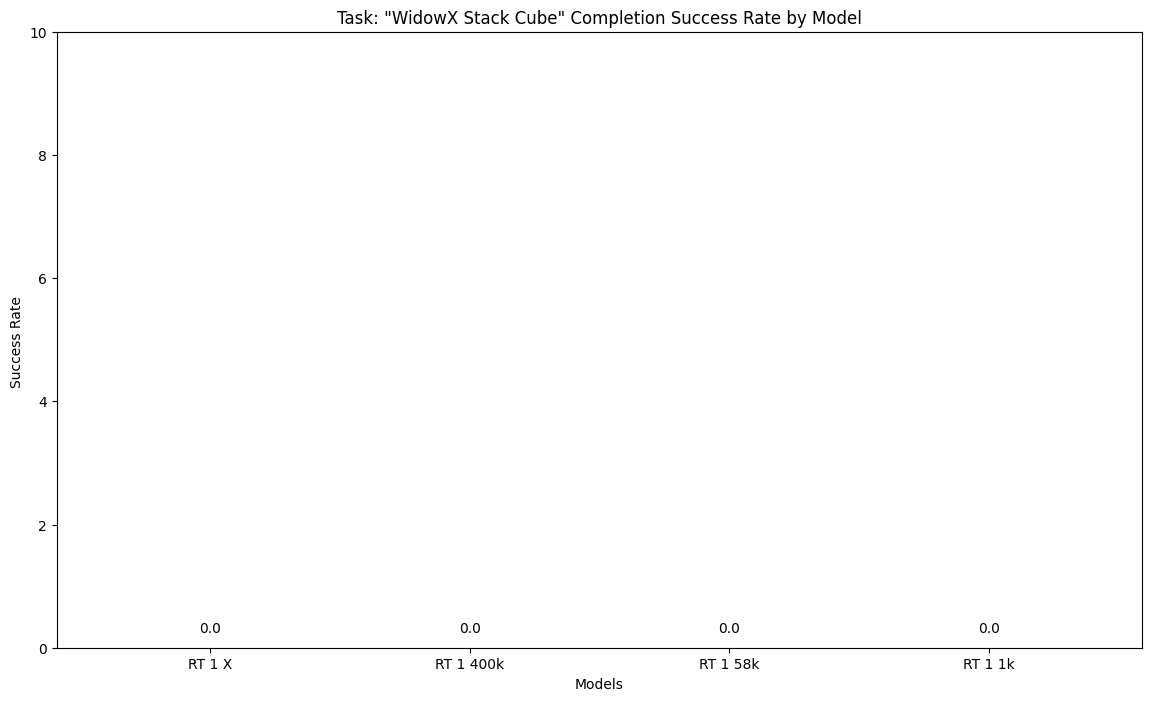

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for four models (replace these with your actual data)
model_1_success = widowx_stack_cube_rt_1_x_success
model_2_success = widowx_stack_cube_rt_1_400k_success
model_3_success = widowx_stack_cube_rt_1_58k_success
model_4_success = widowx_stack_cube_rt_1_1k_success

# List of model names and their success data
models = {
    'RT 1 X': model_1_success,
    'RT 1 400k': model_2_success,
    'RT 1 58k': model_3_success,
    'RT 1 1k': model_4_success
}

# Calculate success rates and scale them to a range of 0-10
model_names = []
success_rates = []

for model_name, success_data in models.items():
    success_rate = np.mean(success_data) * 10  # Scale success rate to 0-10
    model_names.append(model_name)
    success_rates.append(success_rate)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, success_rates, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Task: "WidowX Stack Cube" Completion Success Rate by Model')
plt.xlabel('Models')
plt.ylabel('Success Rate ')
plt.ylim(0, 10)  # Success rate ranges from 0 to 10

# Annotate bars with success rate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()




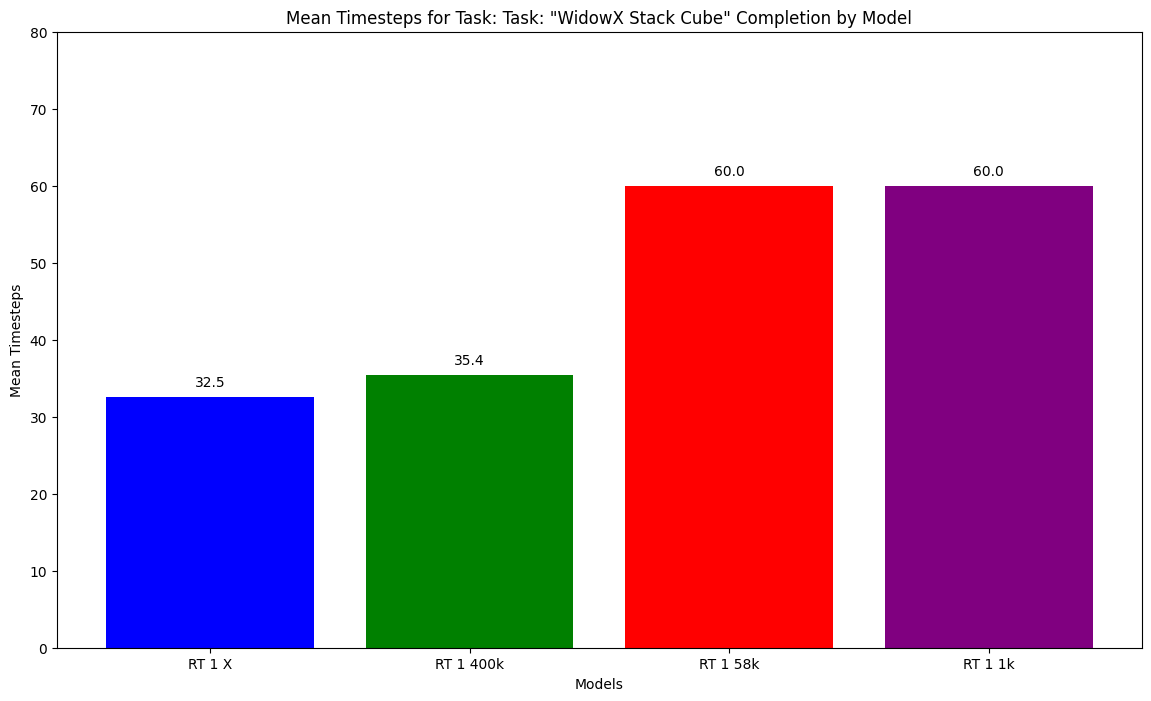

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Example timestep data for four models (replace these with your actual data)
model_1_timesteps = widowx_stack_cube_rt_1_x_timesteps
model_2_timesteps = widowx_stack_cube_rt_1_400k_timesteps
model_3_timesteps = widowx_stack_cube_rt_1_58k_timesteps
model_4_timesteps = widowx_stack_cube_rt_1_1k_timesteps

# List of model names and their timesteps data
models_timesteps = {
    'RT 1 X': model_1_timesteps,
    'RT 1 400k': model_2_timesteps,
    'RT 1 58k': model_3_timesteps,
    'RT 1 1k': model_4_timesteps
}

# Calculate mean timesteps
model_names = []
mean_timesteps = []

for model_name, timesteps_data in models_timesteps.items():
    mean_timestep = np.mean(timesteps_data)
    model_names.append(model_name)
    mean_timesteps.append(mean_timestep)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, mean_timesteps, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Mean Timesteps for Task: Task: "WidowX Stack Cube" Completion by Model')
plt.xlabel('Models')
plt.ylabel('Mean Timesteps')
plt.ylim(0, max(mean_timesteps) + 20)  # Adjust ylim to fit the highest mean timestep

# Annotate bars with mean timestep values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()

In [76]:
# @title Select your model and environment

task_name = "widowx_put_eggplant_in_basket"  # @param ["google_robot_pick_coke_can", "google_robot_move_near", "google_robot_open_drawer", "google_robot_close_drawer", "widowx_spoon_on_towel", "widowx_carrot_on_plate", "widowx_stack_cube", "widowx_put_eggplant_in_basket"]

if 'env' in locals():
  print("Closing existing env")
  env.close()
  del env
env = simpler_env.make(task_name)

# Note: we turned off the denoiser as the colab kernel will crash if it's turned on
# To use the denoiser, please git clone our SIMPLER environments
# and perform evaluations locally.
sapien.render_config.rt_use_denoiser = False

obs, reset_info = env.reset()
instruction = env.get_language_instruction()
print("Reset info", reset_info)
print("Instruction", instruction)

if "google" in task_name:
  policy_setup = "google_robot"
else:
  policy_setup = "widowx_bridge"

Closing existing env
Reset info {'scene_name': 'bridge_table_1_v2', 'scene_offset': None, 'scene_pose': None, 'scene_table_height': 0.87, 'urdf_version': '', 'rgb_overlay_path': '/content/ManiSkill2_real2sim/data/real_inpainting/bridge_sink.png', 'rgb_overlay_cameras': ['3rd_view_camera'], 'rgb_overlay_mode': 'background', 'disable_bad_material': False, 'episode_model_ids': ['eggplant', 'dummy_sink_target_plane'], 'episode_model_scales': [1.0, 1.0], 'episode_source_obj_name': 'eggplant', 'episode_target_obj_name': 'dummy_sink_target_plane', 'episode_source_obj_init_pose_wrt_robot_base': Pose([0.246488, -0.130078, 0.0887247], [0.399633, -0.116981, 0.0274486, -0.908766]), 'episode_target_obj_init_pose_wrt_robot_base': Pose([0.275236, 0.0375851, 0.0858802], [0.0120072, 0.0649478, -0.00353153, -0.99781]), 'episode_id': 1}
Instruction put eggplant into yellow basket


In [77]:
#@title Run inference widowx_put_eggplant_in_basket_rt_1_x
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_x"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_put_eggplant_in_basket_rt_1_x_success = []
widowx_put_eggplant_in_basket_rt_1_x_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1

  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_put_eggplant_in_basket_rt_1_x_success.append(success)
  widowx_put_eggplant_in_basket_rt_1_x_timesteps.append(timestep)
print(
    "**Overall Success**",
    np.mean(widowx_put_eggplant_in_basket_rt_1_x_success),
    f"({np.sum(widowx_put_eggplant_in_basket_rt_1_x_success)}/{len(widowx_put_eggplant_in_basket_rt_1_x_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_stack_cube_rt_1_1k_timesteps),
    f"({np.sum(widowx_put_eggplant_in_basket_rt_1_x_timesteps)}/{len(widowx_put_eggplant_in_basket_rt_1_x_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

put eggplant into yellow basket
Episode 0 success: False
Episode 0 Timesteps: 40 Stats: OrderedDict([('moved_correct_obj', True), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggplant into yellow basket
Episode 1 success: False
Episode 1 Timesteps: 47 Stats: OrderedDict([('moved_correct_obj', True), ('moved_wrong_obj', False), ('is_src_obj_grasped', True), ('consecutive_grasp', False), ('src_on_target', False)])
put eggplant into yellow basket
Episode 2 success: False
Episode 2 Timesteps: 50 Stats: OrderedDict([('moved_correct_obj', True), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggplant into yellow basket
Episode 3 success: False
Episode 3 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', True), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggplant int

In [78]:
#@title Run inference widowx_put_eggplant_in_basket_rt_1_400k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_400k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_put_eggplant_in_basket_rt_1_400k_success = []
widowx_put_eggplant_in_basket_rt_1_400k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1

  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_put_eggplant_in_basket_rt_1_400k_success.append(success)
  widowx_put_eggplant_in_basket_rt_1_400k_timesteps.append(timestep)
print(
    "**Overall Success**",
    np.mean(widowx_put_eggplant_in_basket_rt_1_400k_success),
    f"({np.sum(widowx_put_eggplant_in_basket_rt_1_400k_success)}/{len(widowx_put_eggplant_in_basket_rt_1_400k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_put_eggplant_in_basket_rt_1_400k_timesteps),
    f"({np.sum(widowx_put_eggplant_in_basket_rt_1_400k_timesteps)}/{len(widowx_put_eggplant_in_basket_rt_1_400k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

put eggplant into yellow basket
Episode 0 success: False
Episode 0 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggplant into yellow basket
Episode 1 success: False
Episode 1 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggplant into yellow basket
Episode 2 success: False
Episode 2 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggplant into yellow basket
Episode 3 success: False
Episode 3 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggp

In [79]:
#@title Run inference widowx_put_eggplant_in_basket_rt_1_58k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_58k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_put_eggplant_in_basket_rt_1_58k_success = []
widowx_put_eggplant_in_basket_rt_1_58k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1

  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_put_eggplant_in_basket_rt_1_58k_success.append(success)
  widowx_put_eggplant_in_basket_rt_1_58k_timesteps.append(timestep)
print(
    "**Overall Success**",
    np.mean(widowx_put_eggplant_in_basket_rt_1_58k_success),
    f"({np.sum(widowx_put_eggplant_in_basket_rt_1_58k_success)}/{len(widowx_put_eggplant_in_basket_rt_1_58k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_put_eggplant_in_basket_rt_1_58k_timesteps),
    f"({np.sum(widowx_put_eggplant_in_basket_rt_1_58k_timesteps)}/{len(widowx_put_eggplant_in_basket_rt_1_58k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

put eggplant into yellow basket
Episode 0 success: False
Episode 0 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', True), ('consecutive_grasp', True), ('src_on_target', False)])
put eggplant into yellow basket
Episode 1 success: False
Episode 1 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggplant into yellow basket
Episode 2 success: False
Episode 2 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggplant into yellow basket
Episode 3 success: False
Episode 3 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggpla

In [80]:
#@title Run inference widowx_put_eggplant_in_basket_rt_1_1k
from simpler_env.policies.rt1.rt1_model import RT1Inference


model_name = "rt_1_1k"
ckpt_path = get_rt_1_checkpoint(model_name)
model = RT1Inference(saved_model_path=ckpt_path, policy_setup=policy_setup)
widowx_put_eggplant_in_basket_rt_1_1k_success = []
widowx_put_eggplant_in_basket_rt_1_1k_timesteps = []
for ep_id in range(0,10):
  obs, reset_info = env.reset()
  instruction = env.get_language_instruction()
  model.reset(instruction)
  print(instruction)

  image = get_image_from_maniskill2_obs_dict(env, obs)  # np.ndarray of shape (H, W, 3), uint8
  images = [image]
  predicted_terminated, success, truncated = False, False, False
  timestep = 0
  while not (predicted_terminated or truncated):
      # step the model; "raw_action" is raw model action output; "action" is the processed action to be sent into maniskill env
      raw_action, action = model.step(image)
      predicted_terminated = bool(action["terminate_episode"][0] > 0)
      obs, reward, success, truncated, info = env.step(
          np.concatenate([action["world_vector"], action["rot_axangle"], action["gripper"]])
      )
      #print(timestep, info)
      # update image observation
      image = get_image_from_maniskill2_obs_dict(env, obs)
      images.append(image)
      timestep += 1

  episode_stats = info.get("episode_stats", {})
  print(f"Episode {ep_id} success: {success}")
  print(f"Episode {ep_id} Timesteps: {timestep} Stats: {episode_stats}")
  widowx_put_eggplant_in_basket_rt_1_1k_success.append(success)
  widowx_put_eggplant_in_basket_rt_1_1k_timesteps.append(timestep)
print(
    "**Overall Success**",
    np.mean(widowx_put_eggplant_in_basket_rt_1_1k_success),
    f"({np.sum(widowx_put_eggplant_in_basket_rt_1_1k_success)}/{len(widowx_put_eggplant_in_basket_rt_1_1k_success)})",
)
print(
    "**Overall Timestep**",
    np.mean(widowx_put_eggplant_in_basket_rt_1_1k_timesteps),
    f"({np.sum(widowx_put_eggplant_in_basket_rt_1_1k_timesteps)}/{len(widowx_put_eggplant_in_basket_rt_1_1k_timesteps)})",
)
print(task_name, model_name)
mediapy.show_video(images, fps=10)

put eggplant into yellow basket
Episode 0 success: False
Episode 0 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggplant into yellow basket
Episode 1 success: False
Episode 1 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggplant into yellow basket
Episode 2 success: False
Episode 2 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggplant into yellow basket
Episode 3 success: False
Episode 3 Timesteps: 120 Stats: OrderedDict([('moved_correct_obj', False), ('moved_wrong_obj', False), ('is_src_obj_grasped', False), ('consecutive_grasp', False), ('src_on_target', False)])
put eggp

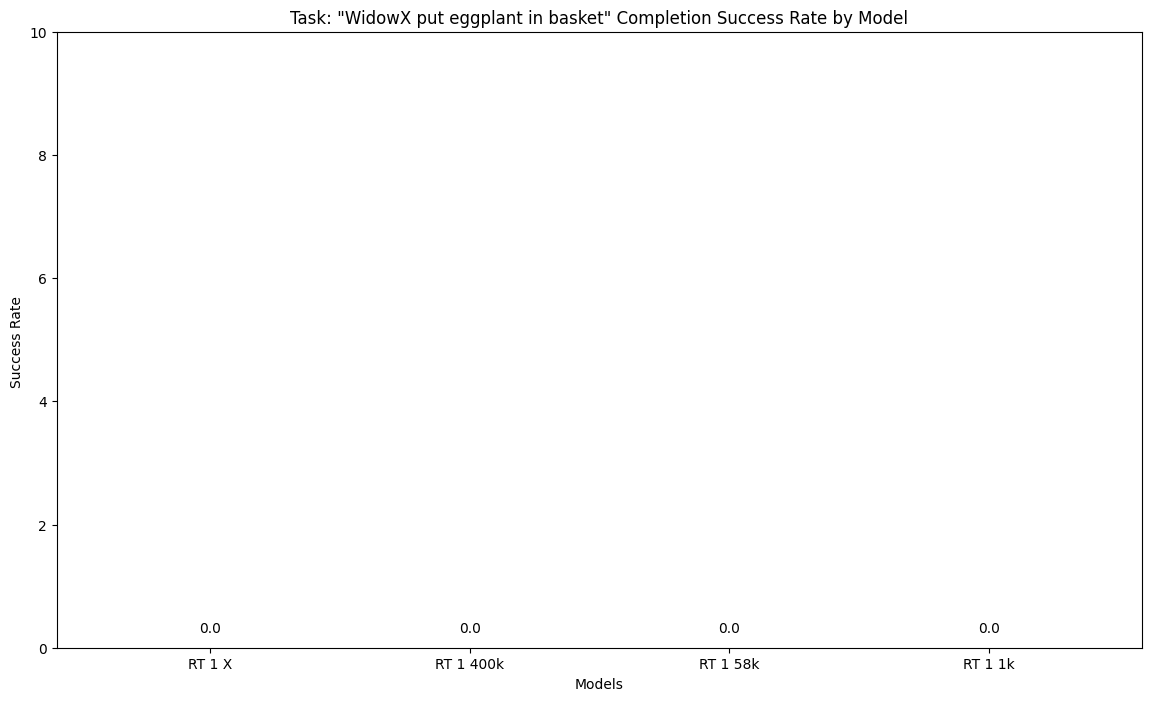

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for four models (replace these with your actual data)
model_1_success = widowx_put_eggplant_in_basket_rt_1_x_success
model_2_success = widowx_put_eggplant_in_basket_rt_1_400k_success
model_3_success = widowx_put_eggplant_in_basket_rt_1_58k_success
model_4_success = widowx_put_eggplant_in_basket_rt_1_1k_success

# List of model names and their success data
models = {
    'RT 1 X': model_1_success,
    'RT 1 400k': model_2_success,
    'RT 1 58k': model_3_success,
    'RT 1 1k': model_4_success
}

# Calculate success rates and scale them to a range of 0-10
model_names = []
success_rates = []

for model_name, success_data in models.items():
    success_rate = np.mean(success_data) * 10  # Scale success rate to 0-10
    model_names.append(model_name)
    success_rates.append(success_rate)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, success_rates, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Task: "WidowX put eggplant in basket" Completion Success Rate by Model')
plt.xlabel('Models')
plt.ylabel('Success Rate ')
plt.ylim(0, 10)  # Success rate ranges from 0 to 10

# Annotate bars with success rate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()




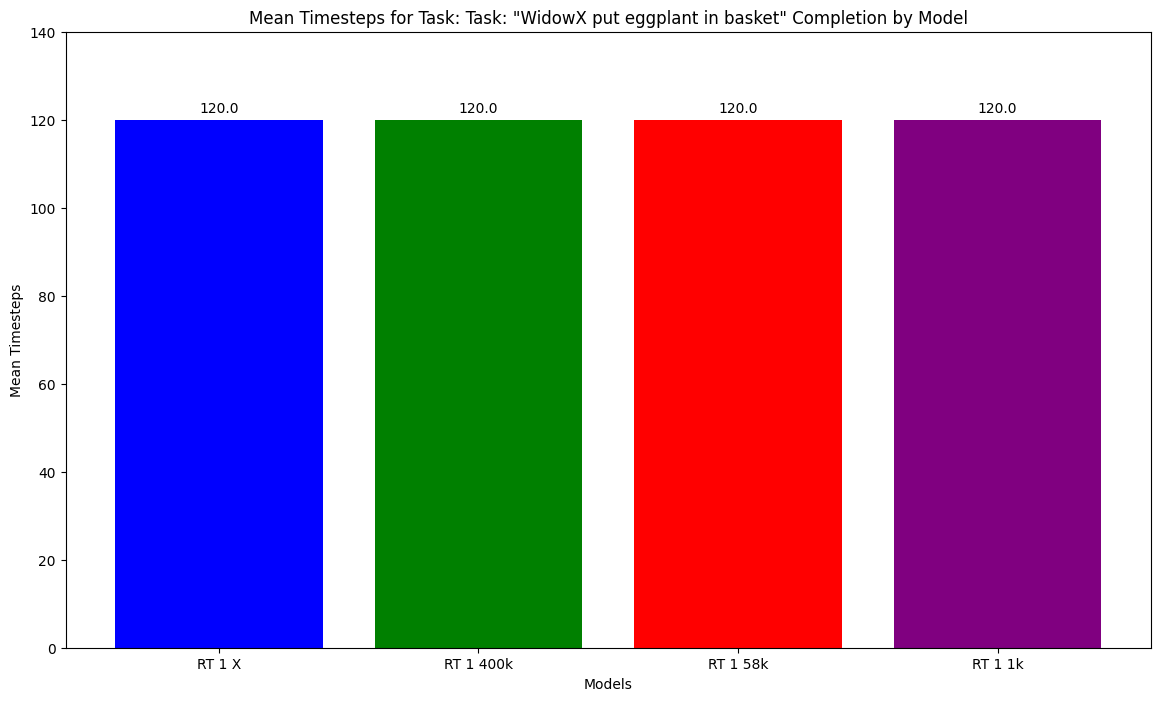

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Example timestep data for four models (replace these with your actual data)
model_1_timesteps = widowx_put_eggplant_in_basket_rt_1_1k_timesteps
model_2_timesteps = widowx_put_eggplant_in_basket_rt_1_1k_timesteps
model_3_timesteps = widowx_put_eggplant_in_basket_rt_1_1k_timesteps
model_4_timesteps = widowx_put_eggplant_in_basket_rt_1_1k_timesteps

# List of model names and their timesteps data
models_timesteps = {
    'RT 1 X': model_1_timesteps,
    'RT 1 400k': model_2_timesteps,
    'RT 1 58k': model_3_timesteps,
    'RT 1 1k': model_4_timesteps
}

# Calculate mean timesteps
model_names = []
mean_timesteps = []

for model_name, timesteps_data in models_timesteps.items():
    mean_timestep = np.mean(timesteps_data)
    model_names.append(model_name)
    mean_timesteps.append(mean_timestep)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, mean_timesteps, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Mean Timesteps for Task: Task: "WidowX put eggplant in basket" Completion by Model')
plt.xlabel('Models')
plt.ylabel('Mean Timesteps')
plt.ylim(0, max(mean_timesteps) + 20)  # Adjust ylim to fit the highest mean timestep

# Annotate bars with mean timestep values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()

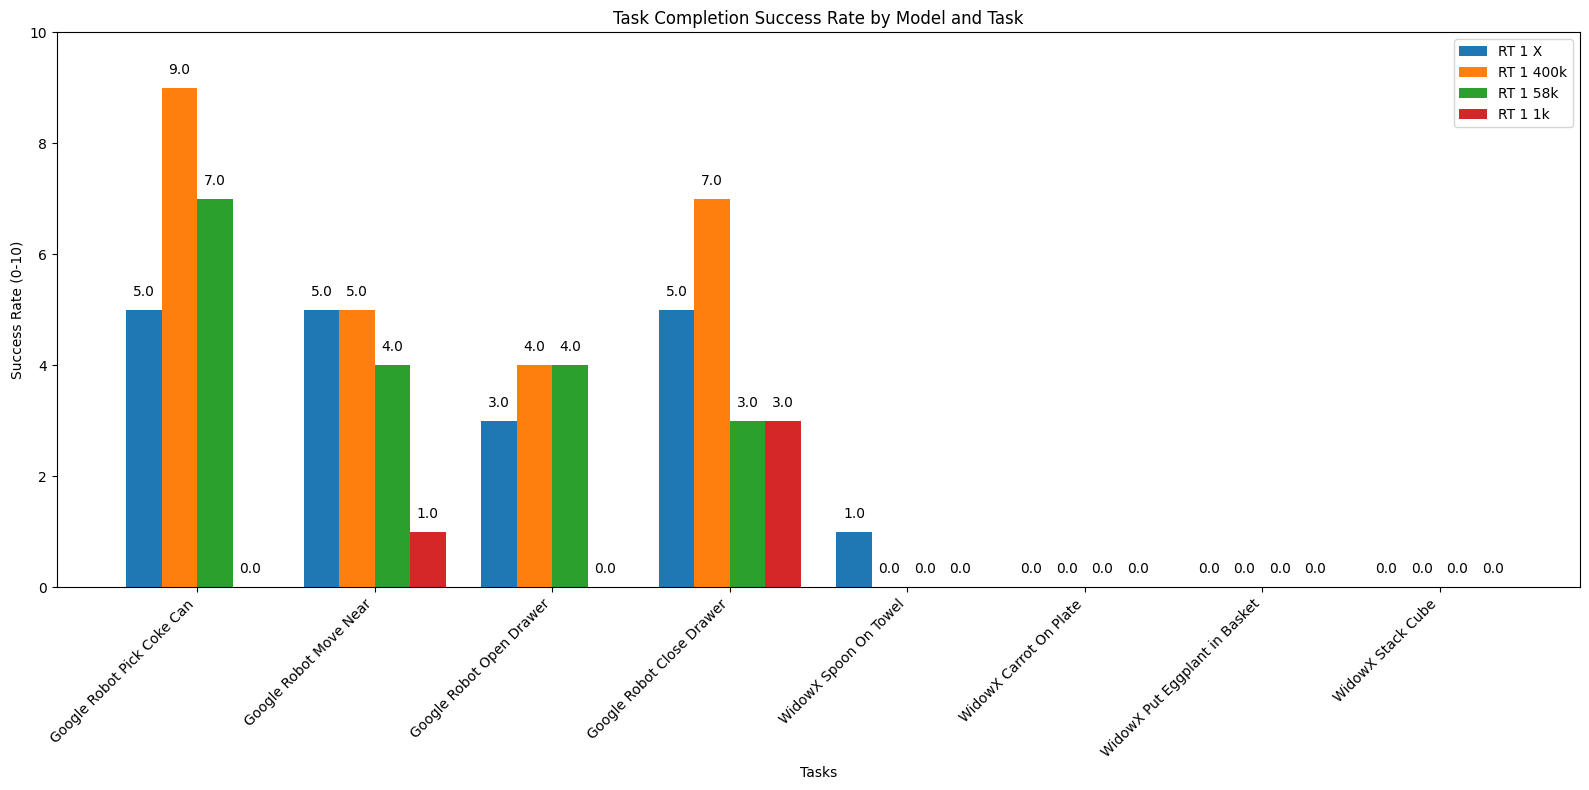

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Example success rate data for four models on eight tasks (replace these with your actual data)
tasks = [
    "Google Robot Pick Coke Can",
    "Google Robot Move Near",
    "Google Robot Open Drawer",
    "Google Robot Close Drawer",
    "WidowX Spoon On Towel",
    "WidowX Carrot On Plate",
    "WidowX Put Eggplant in Basket",
    "WidowX Stack Cube",
]



# Define success data for each model on each task
task_success_data = [
    [
        google_robot_pick_coke_can_rt_1_x_success,
        google_robot_pick_coke_can_rt_1_400k_success,
        google_robot_pick_coke_can_rt_1_58k_success,
        google_robot_pick_coke_can_rt_1_1k_success
    ],
    [
        google_robot_move_near_rt_1_x_success,
        google_robot_move_near_rt_1_400k_success,
        google_robot_move_near_rt_1_58k_success,
        google_robot_move_near_rt_1_1k_success

    ],
    [
        google_robot_open_drawer_rt_1_x_success,
        google_robot_open_drawer_rt_1_400k_success,
        google_robot_open_drawer_rt_1_58k_success,
        google_robot_open_drawer_rt_1_1k_success
    ],
    [
        google_robot_close_drawer_rt_1_x_success,
        google_robot_close_drawer_rt_1_400k_success,
        google_robot_close_drawer_rt_1_58k_success,
        google_robot_close_drawer_rt_1_1k_success
    ],
    [
        widowx_spoon_on_towel_rt_1_x_success,
        widowx_spoon_on_towel_rt_1_400k_success,
        widowx_spoon_on_towel_rt_1_58k_success,
        widowx_spoon_on_towel_rt_1_1k_success
    ],
    [
        widowx_carrot_on_plate_rt_1_x_success,
        widowx_carrot_on_plate_rt_1_400k_success,
        widowx_carrot_on_plate_rt_1_58k_success,
        widowx_carrot_on_plate_rt_1_1k_success
    ],
    [
        widowx_stack_cube_rt_1_x_success,
        widowx_stack_cube_rt_1_400k_success,
        widowx_stack_cube_rt_1_58k_success,
        widowx_stack_cube_rt_1_1k_success
    ],
    [
        widowx_put_eggplant_in_basket_rt_1_x_success,
        widowx_put_eggplant_in_basket_rt_1_400k_success,
        widowx_put_eggplant_in_basket_rt_1_58k_success,
        widowx_put_eggplant_in_basket_rt_1_1k_success
    ]

    # Add more tasks similarly
]

# Calculate success rates and scale them to a range of 0-10
model_names = ['RT 1 X', 'RT 1 400k', 'RT 1 58k', 'RT 1 1k']
scaled_success_data = []

for task in task_success_data:
    task_success_rates = []
    for model_success in task:
        success_rate = np.mean(model_success) * 10  # Scale success rate to 0-10
        task_success_rates.append(success_rate)
    scaled_success_data.append(task_success_rates)

# Plotting
x = np.arange(len(tasks))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))

# Create bars for each model
bars = []
for i, model_name in enumerate(model_names):
    model_success_rates = [task[i] for task in scaled_success_data]
    bars.append(ax.bar(x + (i - 1.5) * width, model_success_rates, width, label=model_name))

# Adding title and labels
ax.set_title('Task Completion Success Rate by Model and Task')
ax.set_xlabel('Tasks')
ax.set_ylabel('Success Rate (0-10)')
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=45, ha='right')
ax.set_ylim(0, 10)
ax.legend()

# Annotate bars with success rate values
for bar_group in bars:
    for bar in bar_group:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


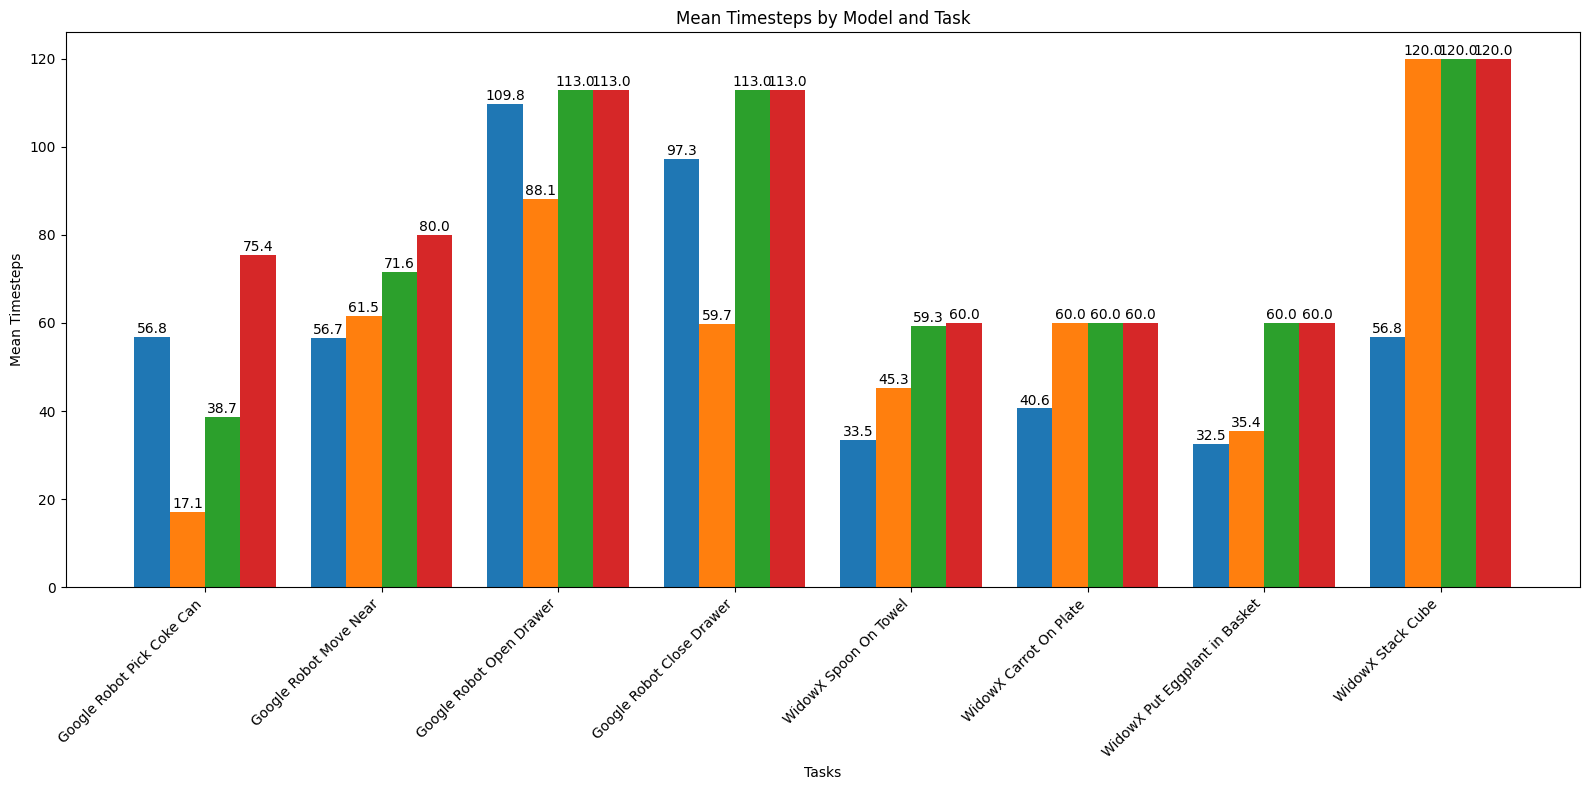

In [86]:

import matplotlib.pyplot as plt
import numpy as np

# Example timestep data for four models on eight tasks (replace these with your actual data)
tasks = [
    "Google Robot Pick Coke Can",
    "Google Robot Move Near",
    "Google Robot Open Drawer",
    "Google Robot Close Drawer",
    "WidowX Spoon On Towel",
    "WidowX Carrot On Plate",
    "WidowX Put Eggplant in Basket",
    "WidowX Stack Cube",
]

# Define timestep data for each model on each task
task_timestep_data = [
    [
        google_robot_pick_coke_can_rt_1_x_timesteps,
        google_robot_pick_coke_can_rt_1_400k_timesteps,
        google_robot_pick_coke_can_rt_1_58k_timesteps,
        google_robot_pick_coke_can_rt_1_1k_timesteps
    ],
    [
        google_robot_move_near_rt_1_x_timesteps,
        google_robot_move_near_rt_1_400k_timesteps,
        google_robot_move_near_rt_1_58k_timesteps,
        google_robot_move_near_rt_1_1k_timesteps

    ],
    [
        google_robot_open_drawer_rt_1_x_timesteps,
        google_robot_open_drawer_rt_1_400k_timesteps,
        google_robot_open_drawer_rt_1_58k_timesteps,
        google_robot_open_drawer_rt_1_1k_timesteps
    ],
    [
        google_robot_close_drawer_rt_1_x_timesteps,
        google_robot_close_drawer_rt_1_400k_timesteps,
        google_robot_close_drawer_rt_1_58k_timesteps,
        google_robot_close_drawer_rt_1_1k_timesteps
    ],
    [
        widowx_spoon_on_towel_rt_1_x_timesteps,
        widowx_spoon_on_towel_rt_1_400k_timesteps,
        widowx_spoon_on_towel_rt_1_58k_timesteps,
        widowx_spoon_on_towel_rt_1_1k_timesteps
    ],
    [
        widowx_carrot_on_plate_rt_1_x_timesteps,
        widowx_carrot_on_plate_rt_1_400k_timesteps,
        widowx_carrot_on_plate_rt_1_58k_timesteps,
        widowx_carrot_on_plate_rt_1_1k_timesteps
    ],
    [
        widowx_stack_cube_rt_1_x_timesteps,
        widowx_stack_cube_rt_1_400k_timesteps,
        widowx_stack_cube_rt_1_58k_timesteps,
        widowx_stack_cube_rt_1_1k_timesteps
    ],
    [
        widowx_put_eggplant_in_basket_rt_1_x_timesteps,
        widowx_put_eggplant_in_basket_rt_1_400k_timesteps,
        widowx_put_eggplant_in_basket_rt_1_58k_timesteps,
        widowx_put_eggplant_in_basket_rt_1_1k_timesteps
    ]
    # Add more tasks similarly
]

# Calculate mean timesteps
model_names = ['RT 1 X', 'RT 1 400k', 'RT 1 58k', 'RT 1 1k']
mean_timesteps_data = []

for task in task_timestep_data:
    task_mean_timesteps = []
    for model_timesteps in task:
        mean_timestep = np.mean(model_timesteps)
        task_mean_timesteps.append(mean_timestep)
    mean_timesteps_data.append(task_mean_timesteps)

# Plotting
x = np.arange(len(tasks))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))

# Create bars for each model
bars = []
for i, model_name in enumerate(model_names):
    model_mean_timesteps = [task[i] for task in mean_timesteps_data]
    bars.append(ax.bar(x + (i - 1.5) * width, model_mean_timesteps, width, label=model_name))

# Adding title and labels
ax.set_title('Mean Timesteps by Model and Task')
ax.set_xlabel('Tasks')
ax.set_ylabel('Mean Timesteps')
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=45, ha='right')

# Annotate bars with mean timestep values
for bar_group in bars:
    for bar in bar_group:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()
